# Compare multi fitted atmospheric parameters - Grey attenuation

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 2th 2023
- last update : June 6th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

from scipy.stats import norm

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## Data

In [5]:
DATE="2023"

In [6]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [7]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [8]:
path_out = "dataout/fitparamatm"

In [9]:
!ls dataout/fitparamatm

multifitcovparamatm-2022-09-27-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-10-12-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-10-26-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-10-27-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-11-09-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-11-10-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-11-23-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-02-14-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-02-15-empty~holo4_003-psf2dffm-polar.csv
multifitco

In [10]:
filenames = [ 
"multifitcovparamatm-2022-09-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-12-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-26-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-23-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-14-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-02-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-11-empty~holo4_003-psf2dffm-polar.csv"]

In [11]:
NDAYS = len(filenames)
tags = [ ]
for fn in filenames:
    the_date_tag = re.findall("^multifitcovparamatm-(.*)-empty~holo4_003-psf2dffm-polar.csv$",fn)[0]
    tags.append(the_date_tag)

In [12]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    #df = df[df['chi2_1']<400]
    
    #df = df[df['chi2_1']<400]
    #cut = (df['chi2_1']<100) & (df['chi2_2']<100) & (df['chi2_3']<100) & (df['chi2_4']<100)
    cut = (df['chi2_1']<100) 
    df = df[cut]
    
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [13]:
df

index       exposure                   spec_date_obs spec_target_label   
1       2  2023051100160  2023-05-11T23:52:01.599991556Z          HD185975  \
2       3  2023051100163  2023-05-11T23:53:55.034507293Z          HD185975   
3      13  2023051100203  2023-05-12T00:20:48.671994986Z          HD185975   
9      19  2023051100228  2023-05-12T00:40:22.965507207Z          HD185975   
10     20  2023051100233  2023-05-12T00:44:31.382492410Z          HD185975   
11     21  2023051100236  2023-05-12T00:46:44.261508838Z          HD185975   
13     23  2023051100245  2023-05-12T00:53:58.869992498Z          HD185975   
16     26  2023051100257  2023-05-12T01:03:30.314509927Z          HD185975   
17     27  2023051100260  2023-05-12T01:05:44.961991483Z          HD185975   

   spec_filter_label  spec_airmass  spec_pressure  spec_temperature   
1              empty      2.125477              0                 0  \
2              empty      2.124050              0                 0   
3              empty      2.113478              0                 0   
9              empty      2.104620              0                 0   
10             empty      2.103332              0                 0   
11             empty      2.101509              0                 0   
13             empty      2.098629              0                 0   
16             empty      2.093680              0                 0   
17             empty      2.091748              0                 0   

    spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3     chi2_4   
1               0      -149.718423  ...  0.001850  0.074003   6.810999  \
2               0      -149.124051  ...  0.001631  0.110717   5.361623   
3               0      -142.433459  ...  0.002014  0.067707   9.087365   
9               0      -137.582208  ...  0.001699  0.088052   5.457459   
10              0      -136.717421  ...  0.001635  0.066612   4.088804   
11              0      -135.994466  ...  0.003229  0.088654  22.301741   
13              0      -134.384948  ...  0.001464  0.082176   3.963201   
16              0      -132.033461  ...  0.002083  0.009151   6.671683   
17              0      -131.283427  ...  0.002275  0.075838  11.191696   

       pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
1   7.245593  1.021730  0.256598  0.001675  0.042276  5.544981  0.980209  
2   7.320346  1.017206  0.234151  0.001519  0.086255  6.384325  0.757046  
3   7.026846  1.024199  0.303880  0.001976  0.014076  5.645572  0.878179  
9   7.460522  1.024639  0.233884  0.001522  0.074876  6.102036  0.922780  
10  7.262500  1.010128  0.211648  0.001363  0.045800  6.009896  0.735803  
11  6.175447  1.012504  0.458125  0.003073  0.145644  5.510697  0.659891  
13  7.633003  1.015319  0.225693  0.001424  0.050955  6.103059  0.901676  
16  7.249855  1.024393  0.263372  0.001698  0.001724  6.043907  0.654620  
17  6.902173  1.025930  0.332267  0.002200  0.037959  5.569093  0.834025  

[9 rows x 92 columns]

In [14]:
NF =len(all_df)

In [15]:
all_df[0].head()

index       exposure                   spec_date_obs spec_target_label   
4     27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975  \
5     28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   

  spec_filter_label  spec_airmass  spec_pressure  spec_temperature   
4             empty      2.052135              0                 0  \
5             empty      2.052582              0                 0   

   spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3    chi2_4   
4              0      -239.381469  ...  0.001214  0.070459  3.429068  \
5              0      -239.202314  ...  0.002100  0.011859  5.505423   

      pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4  7.198238  0.642188  0.288268  0.001155  0.037200  6.366714  0.696058  
5  7.121764  0.988605  0.296650  0.001840  0.072462  6.234264  0.667250  

[2 rows x 98 columns]

In [16]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_63077/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


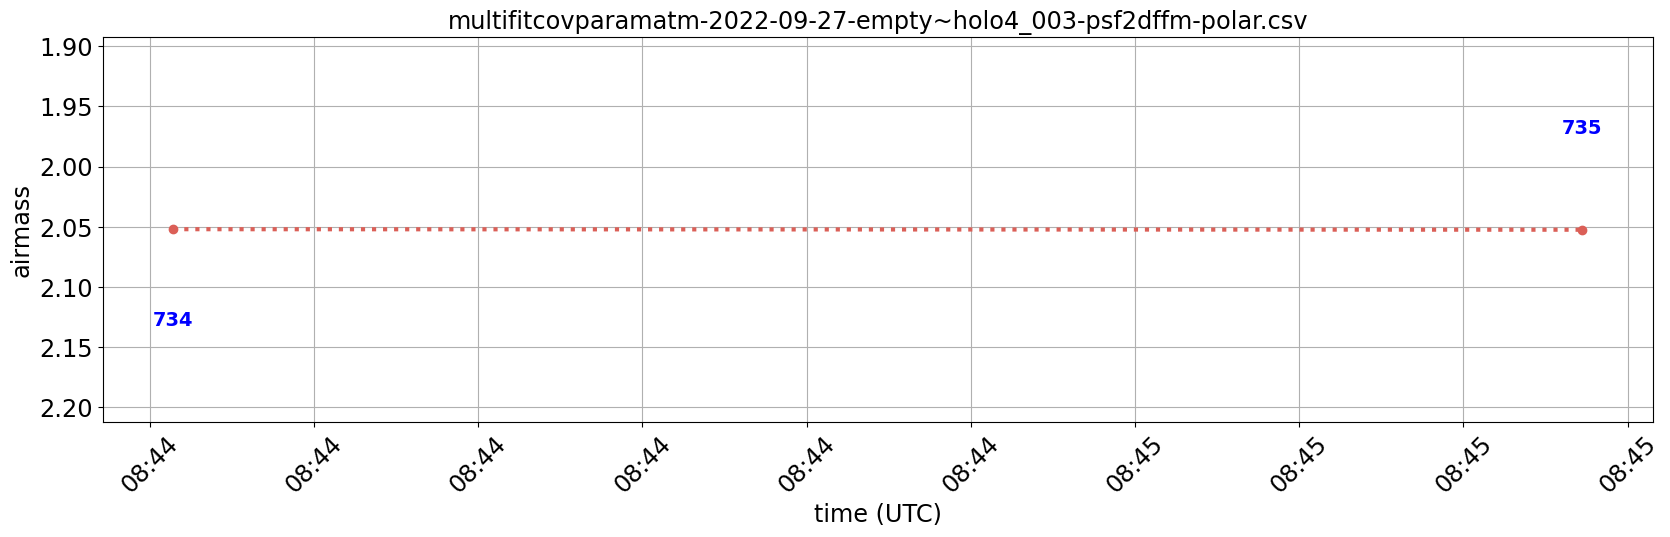

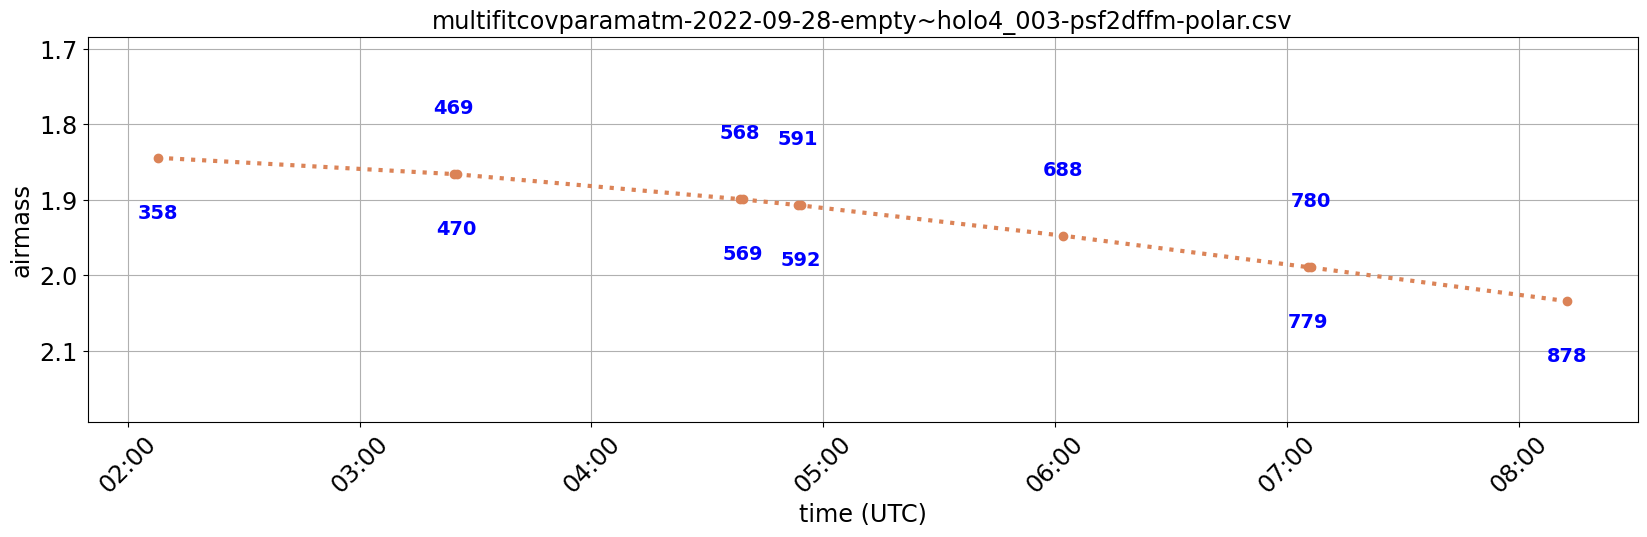

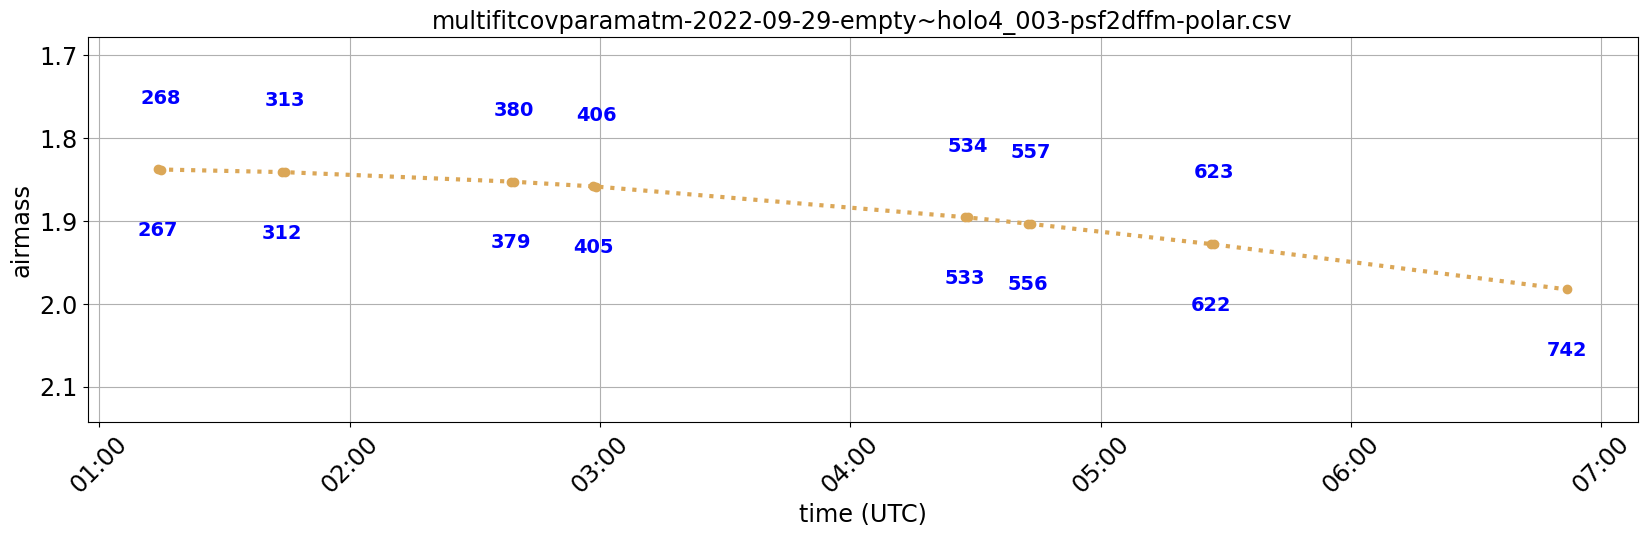

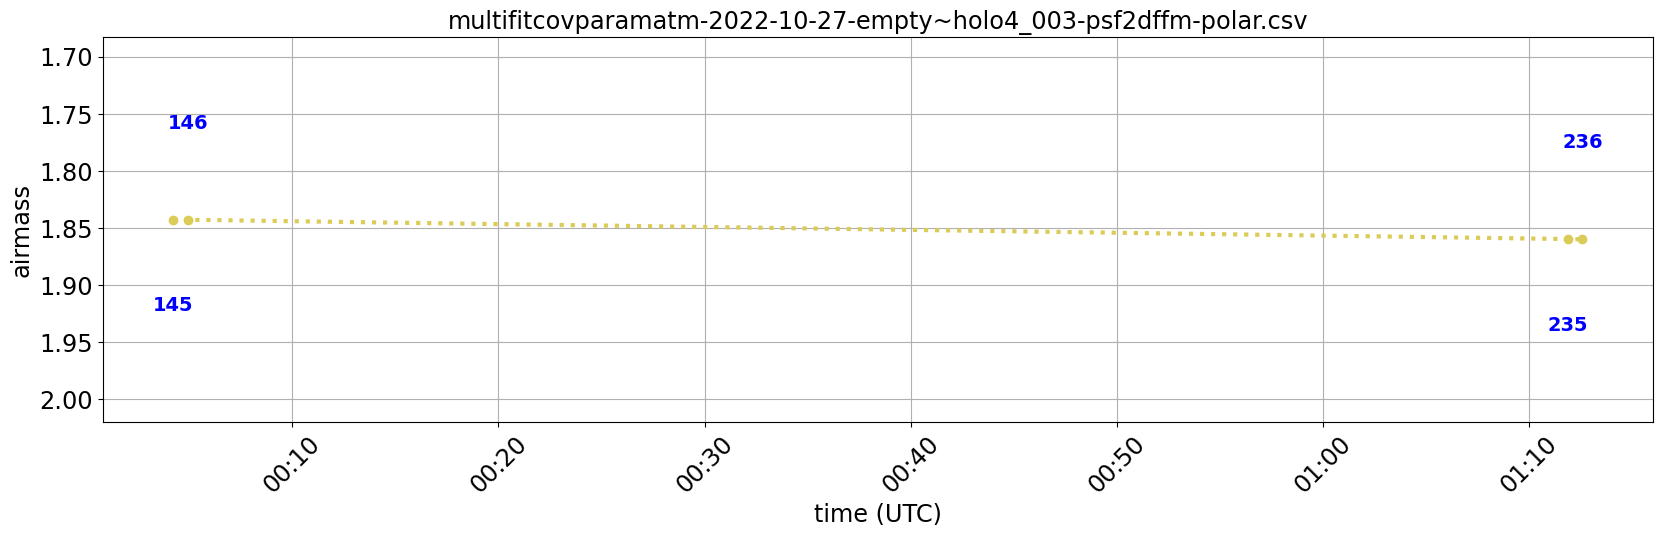

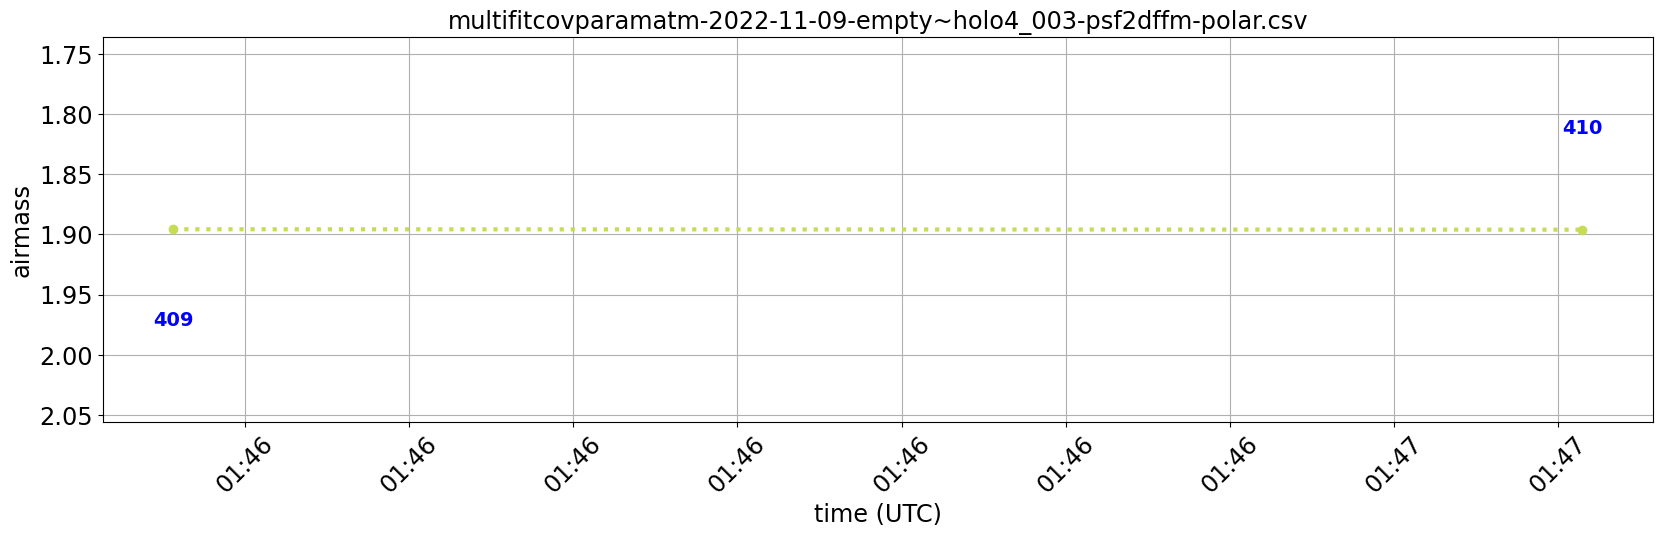

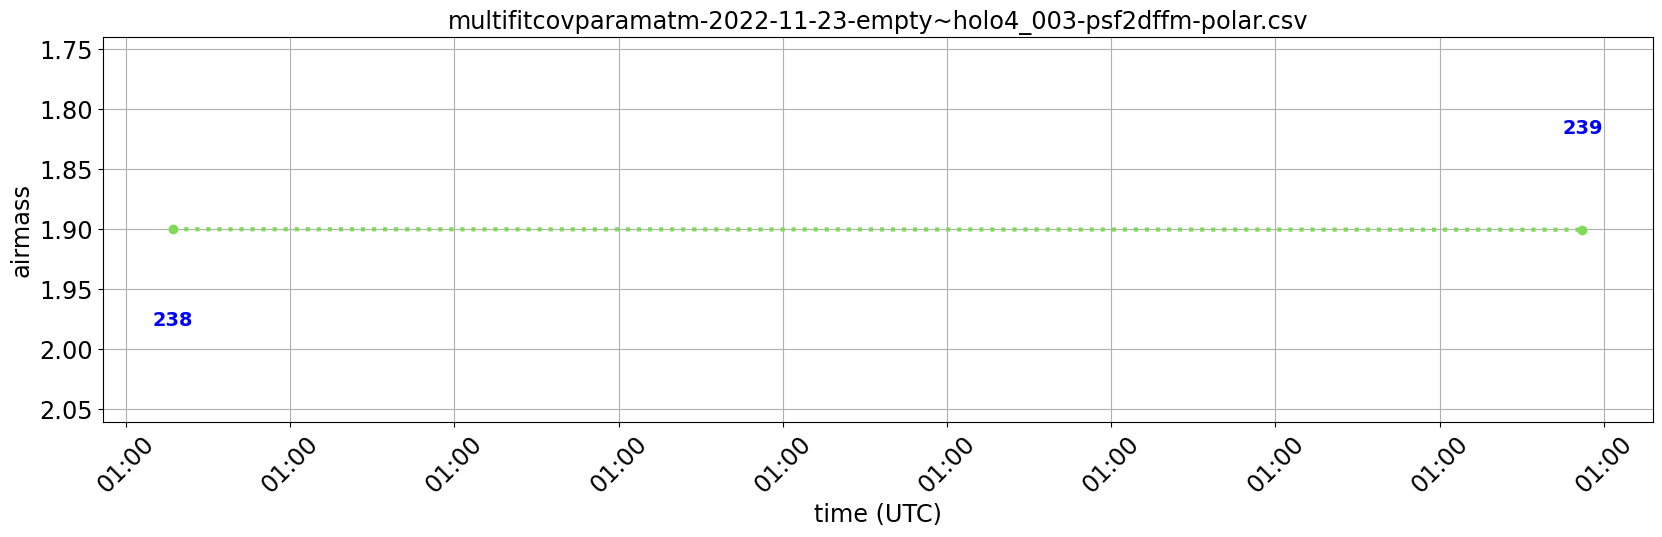

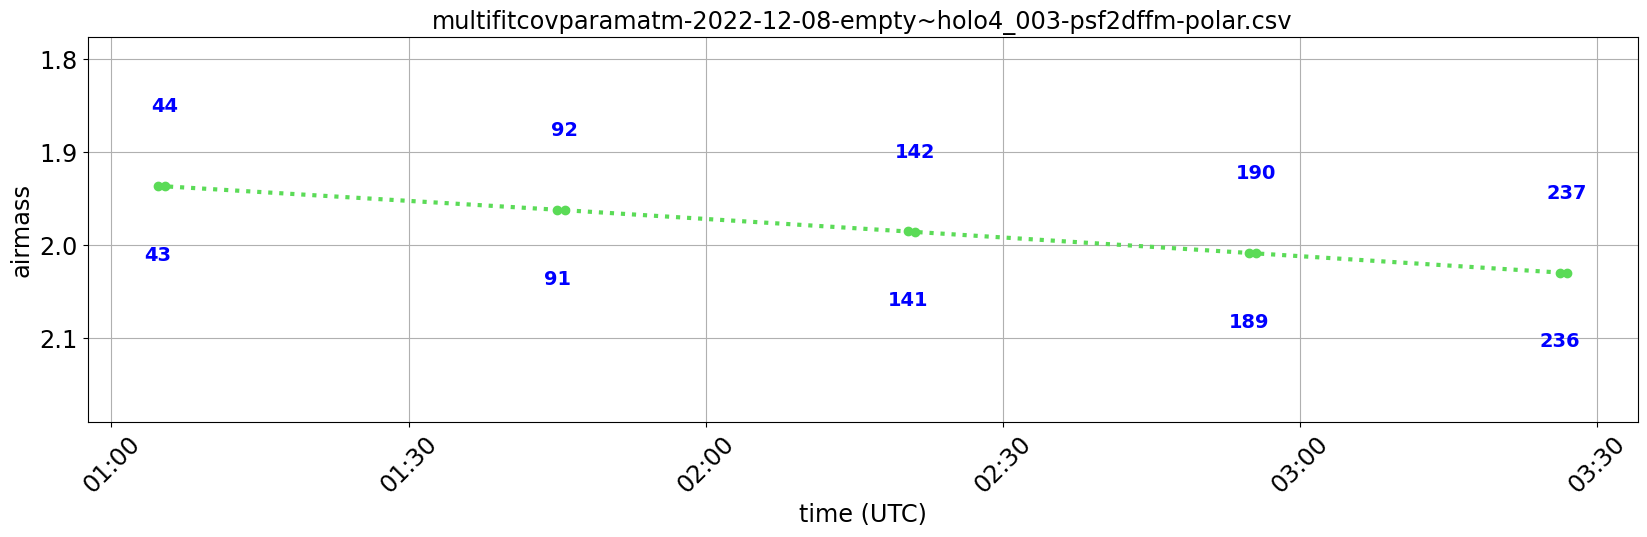

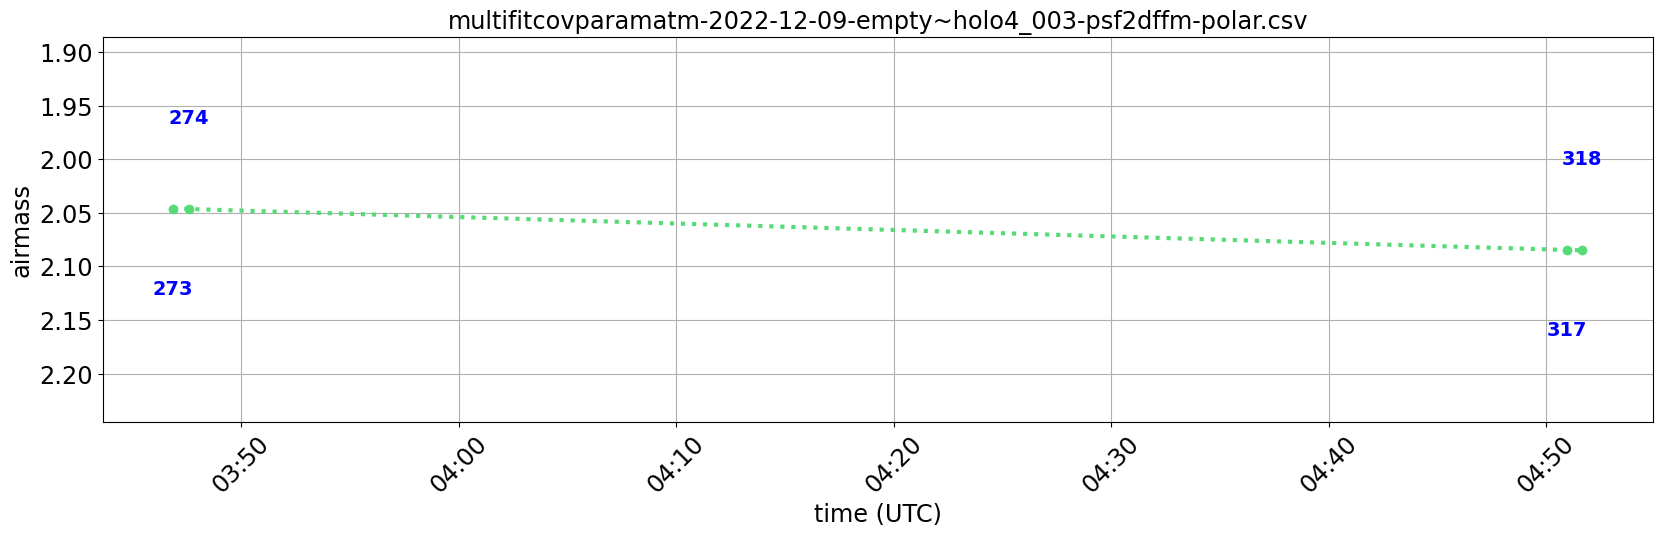

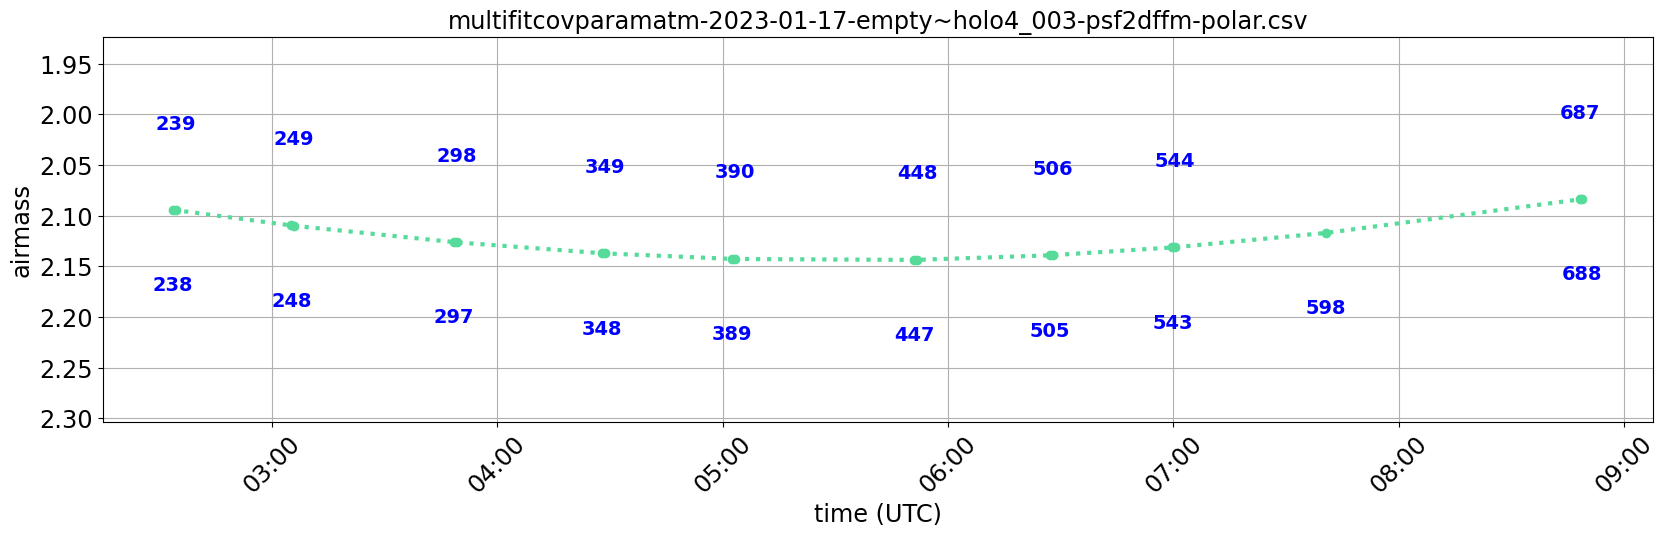

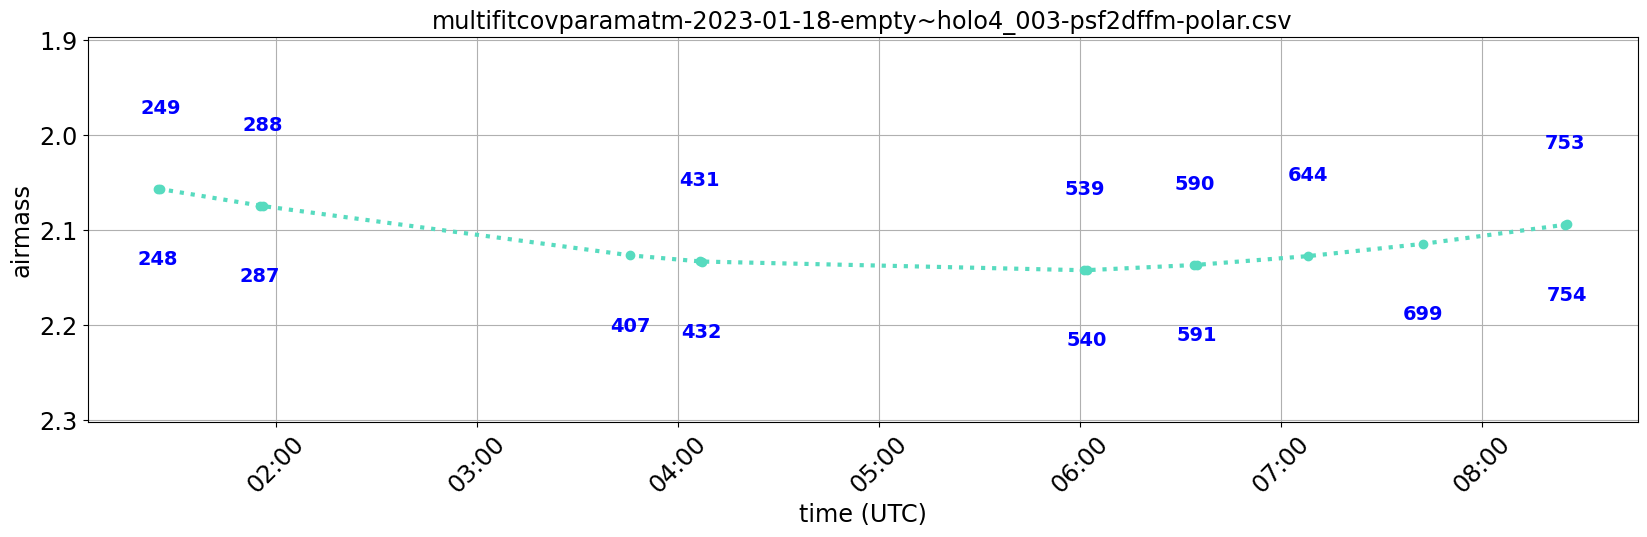

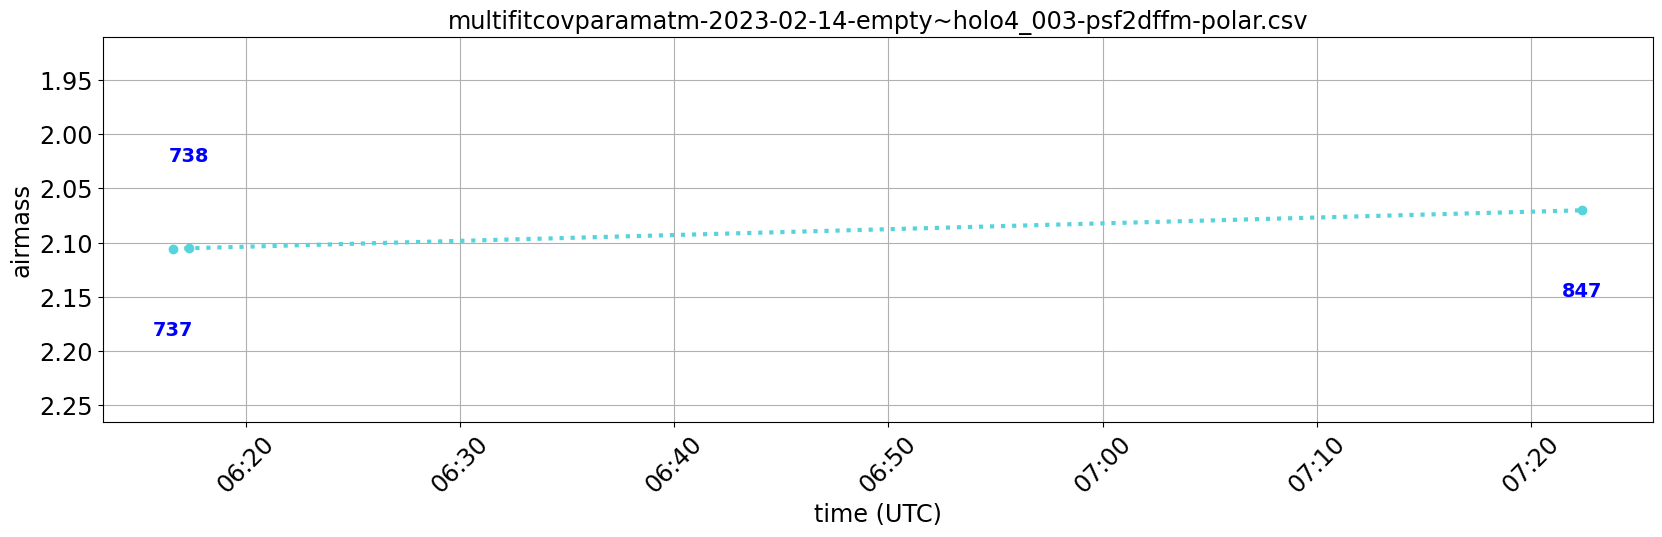

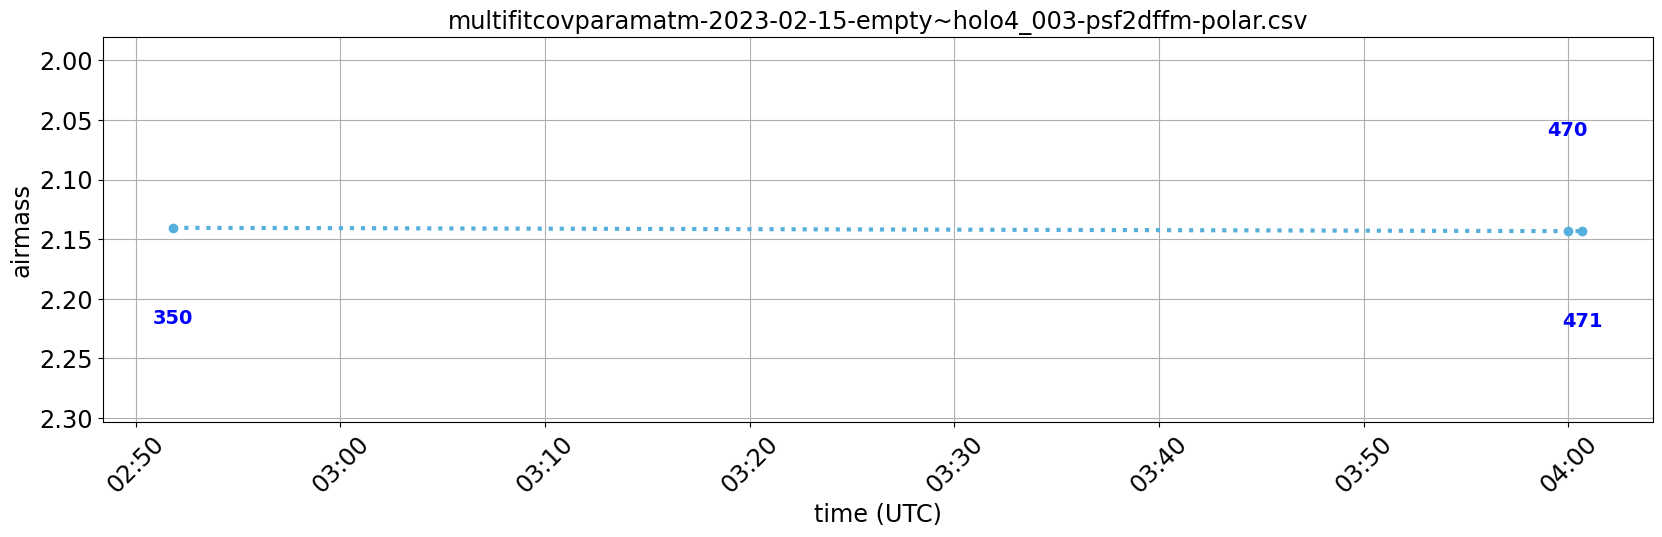

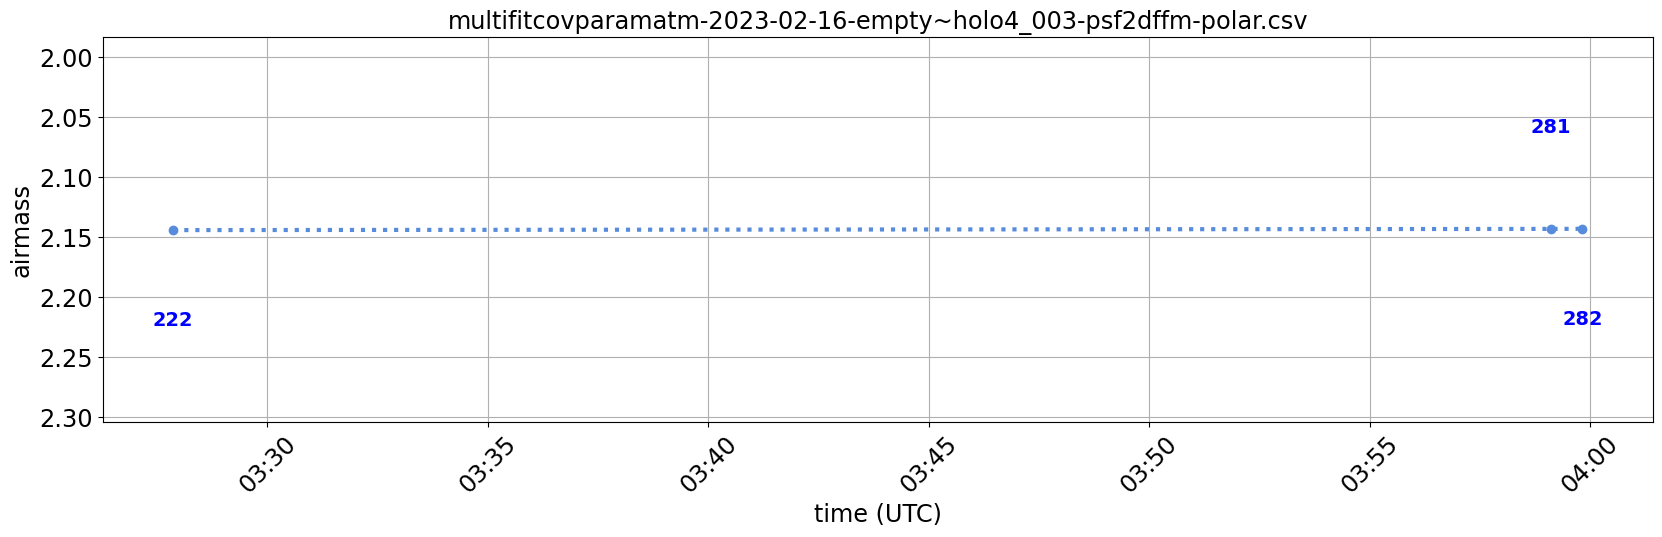

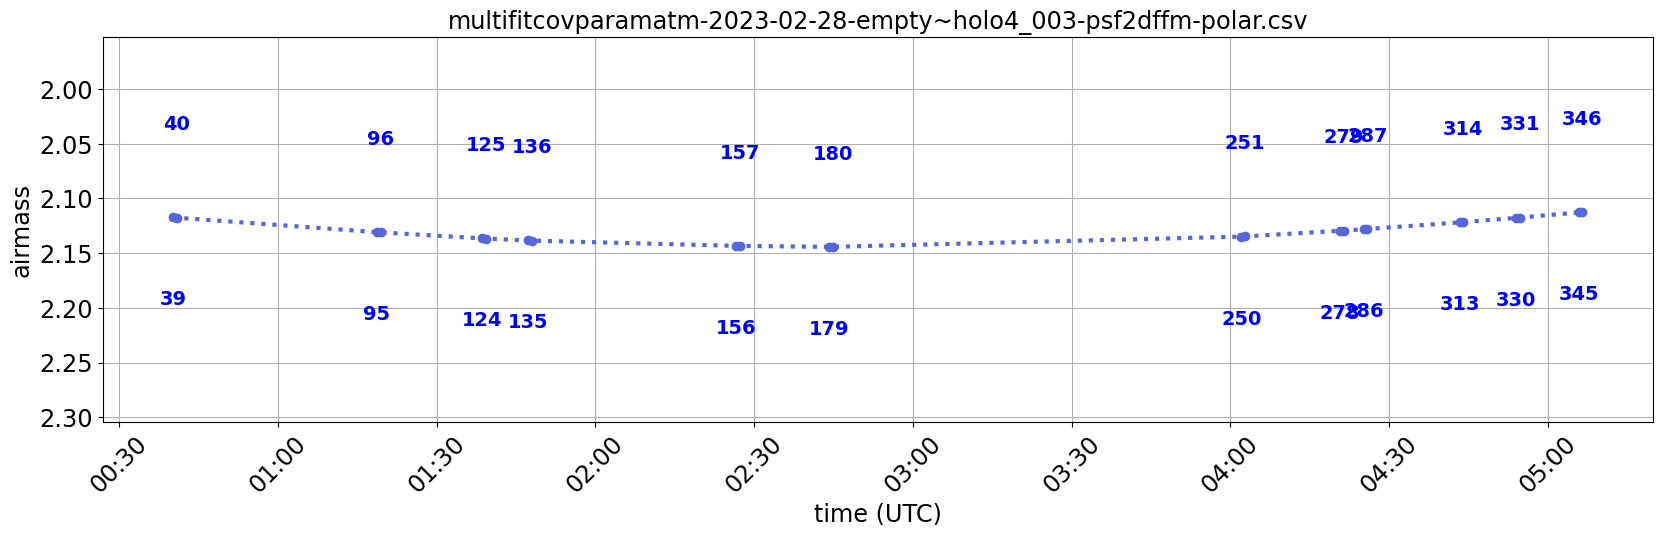

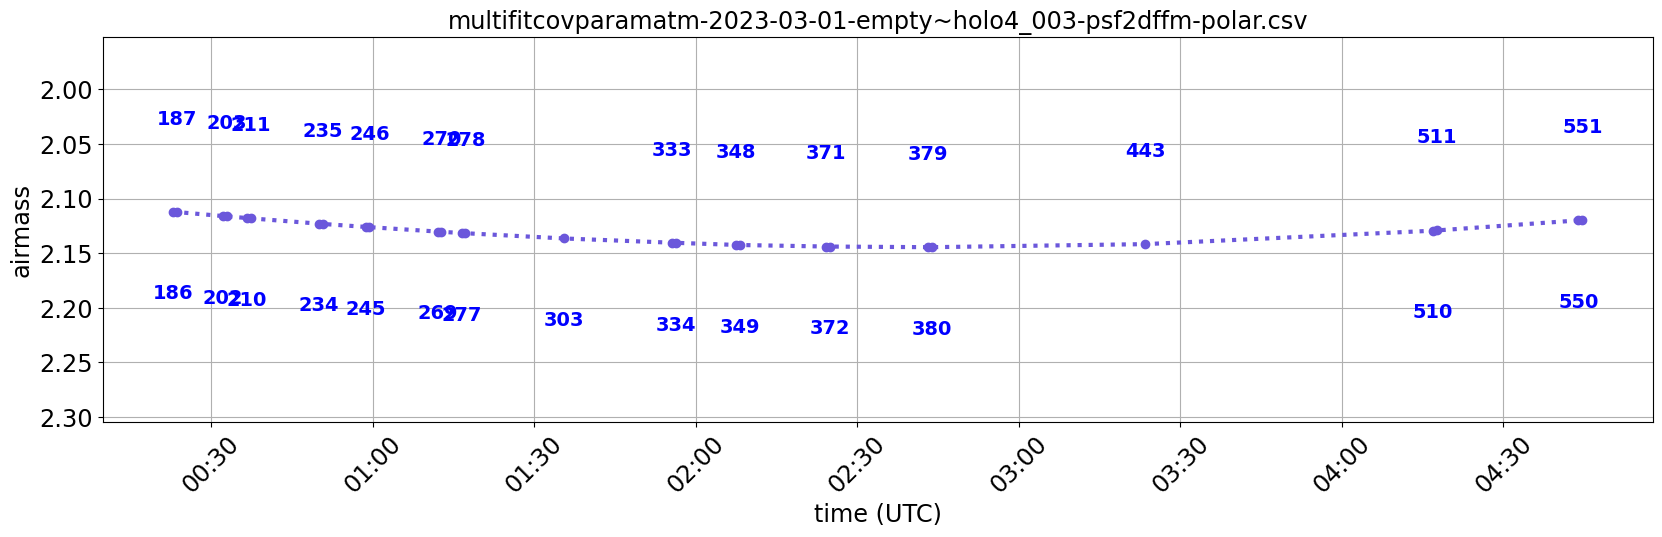

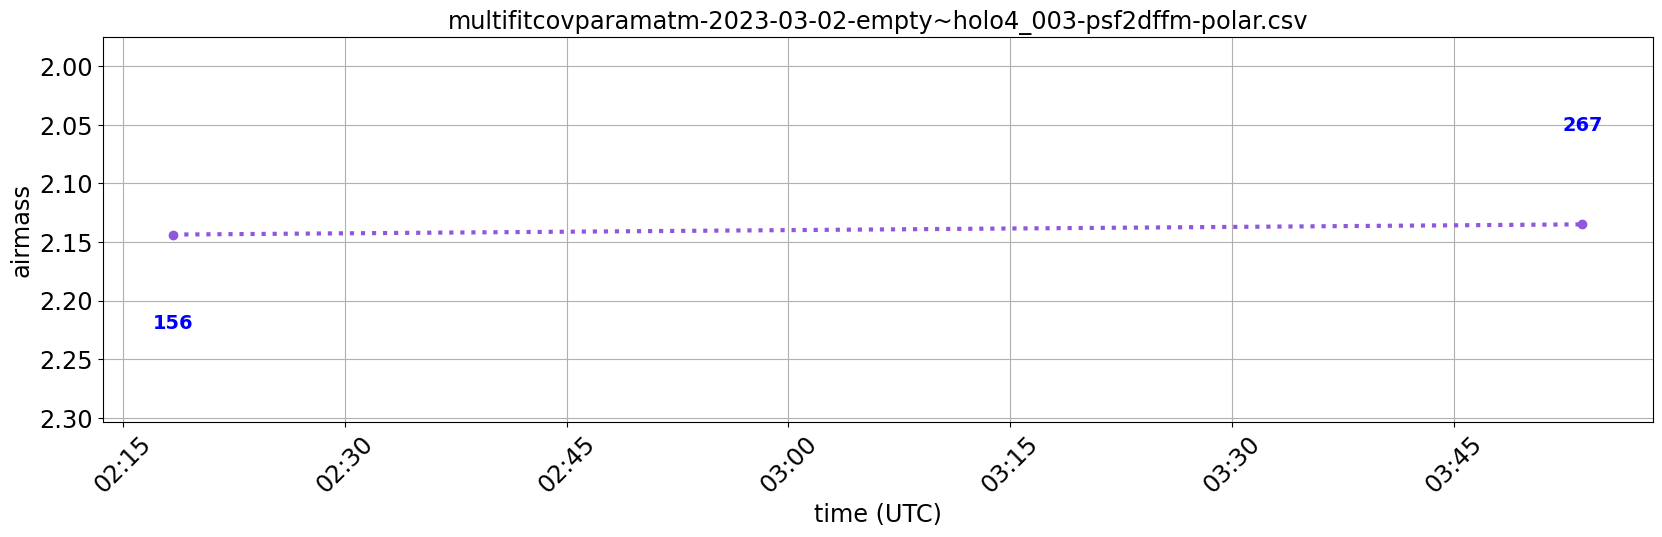

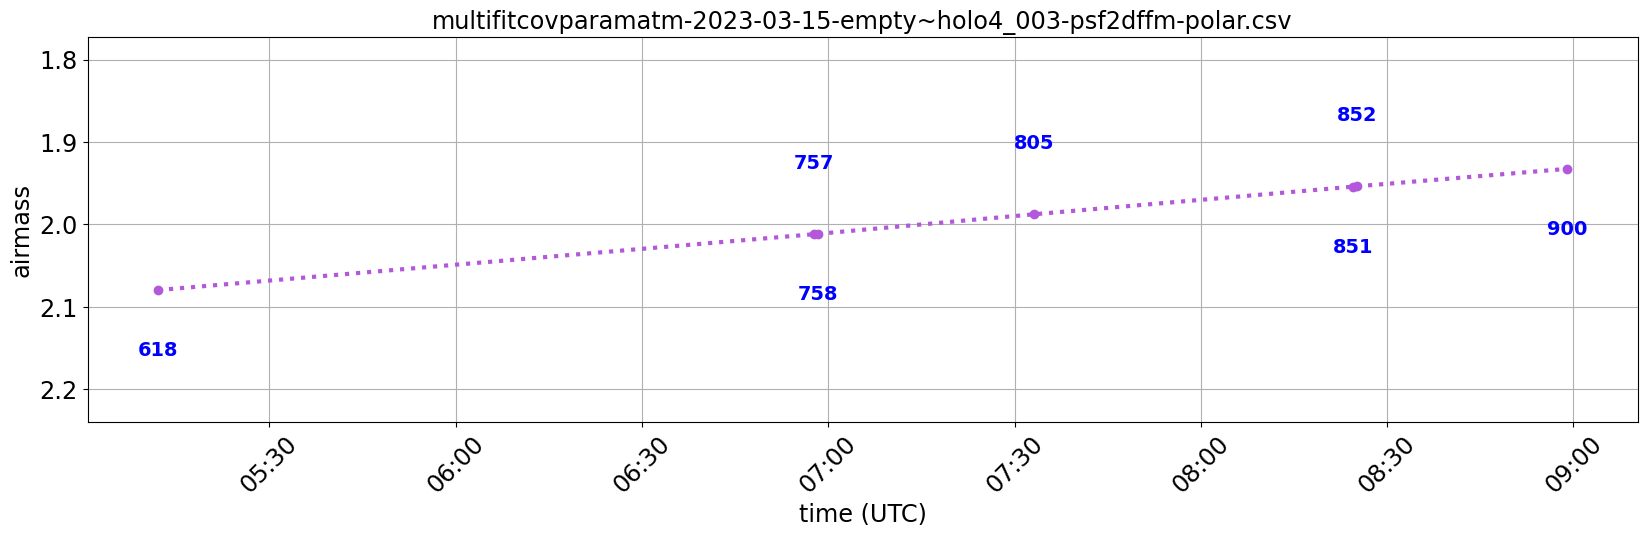

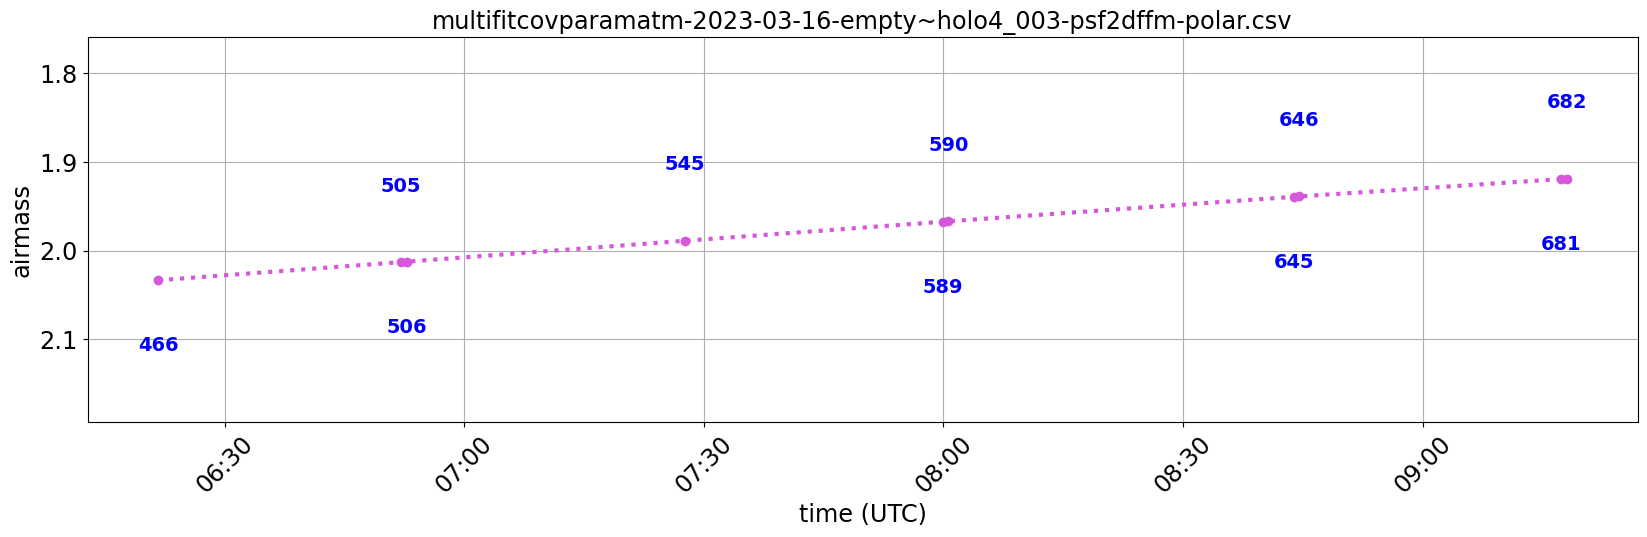

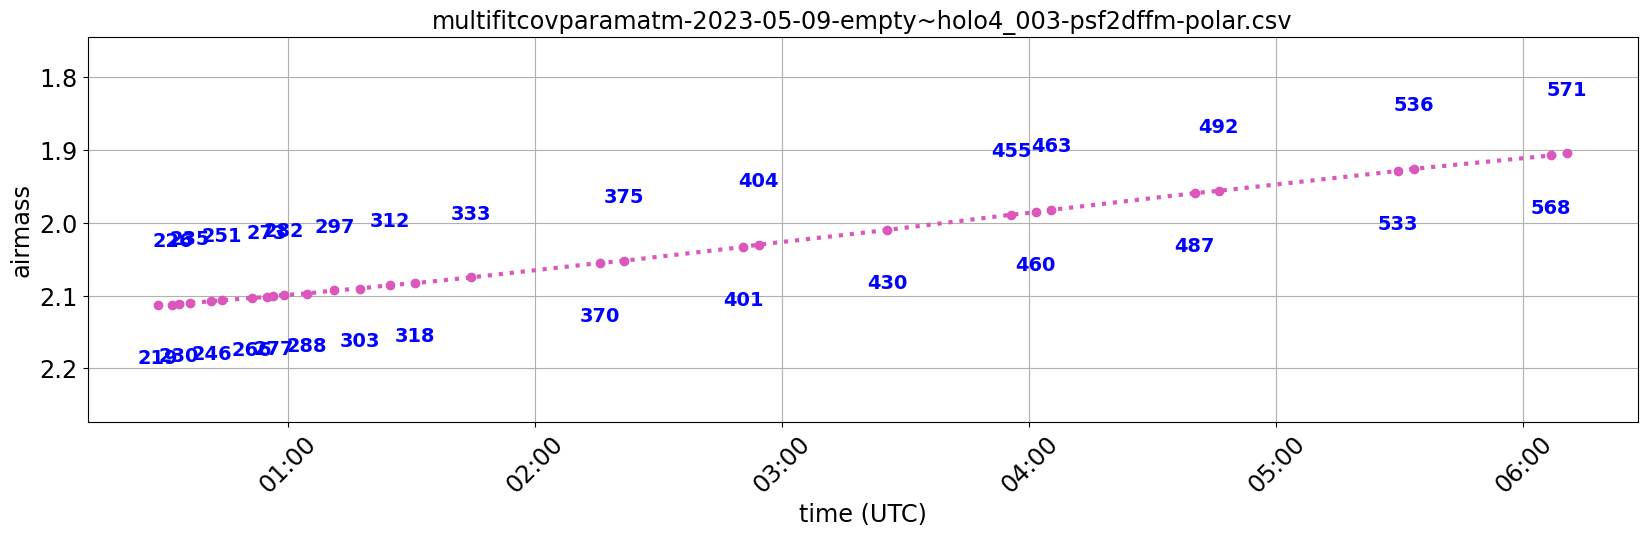

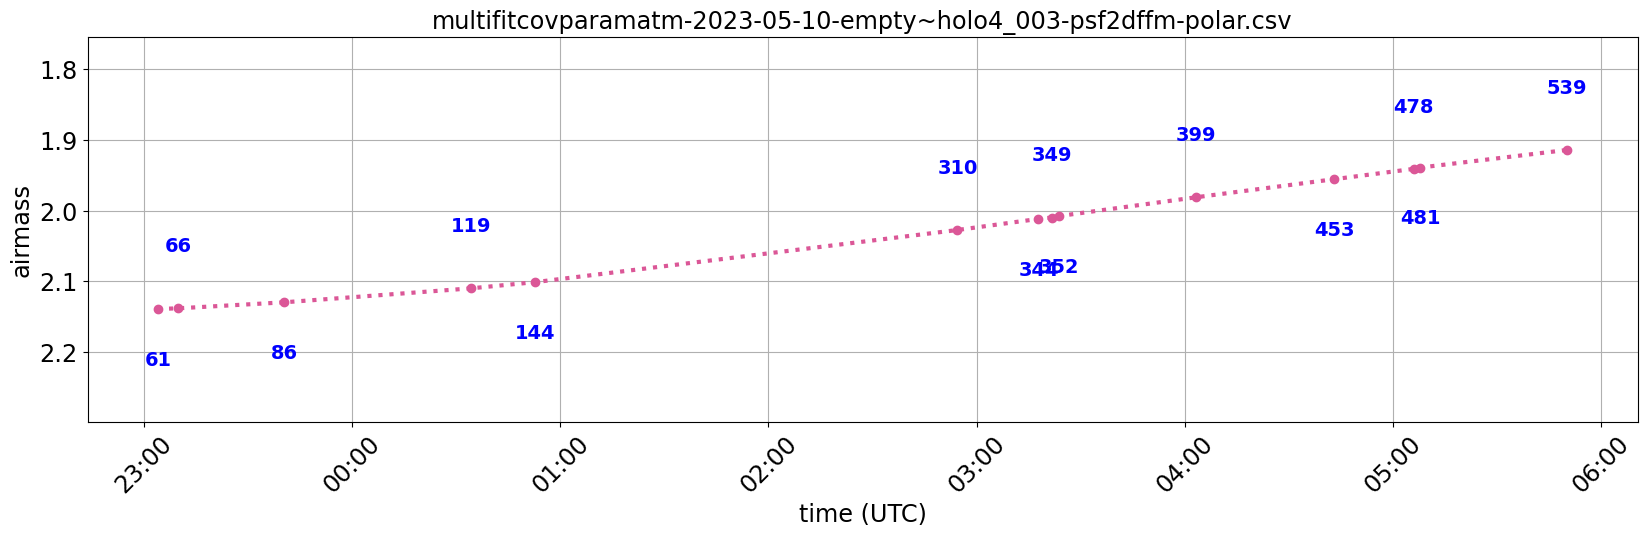

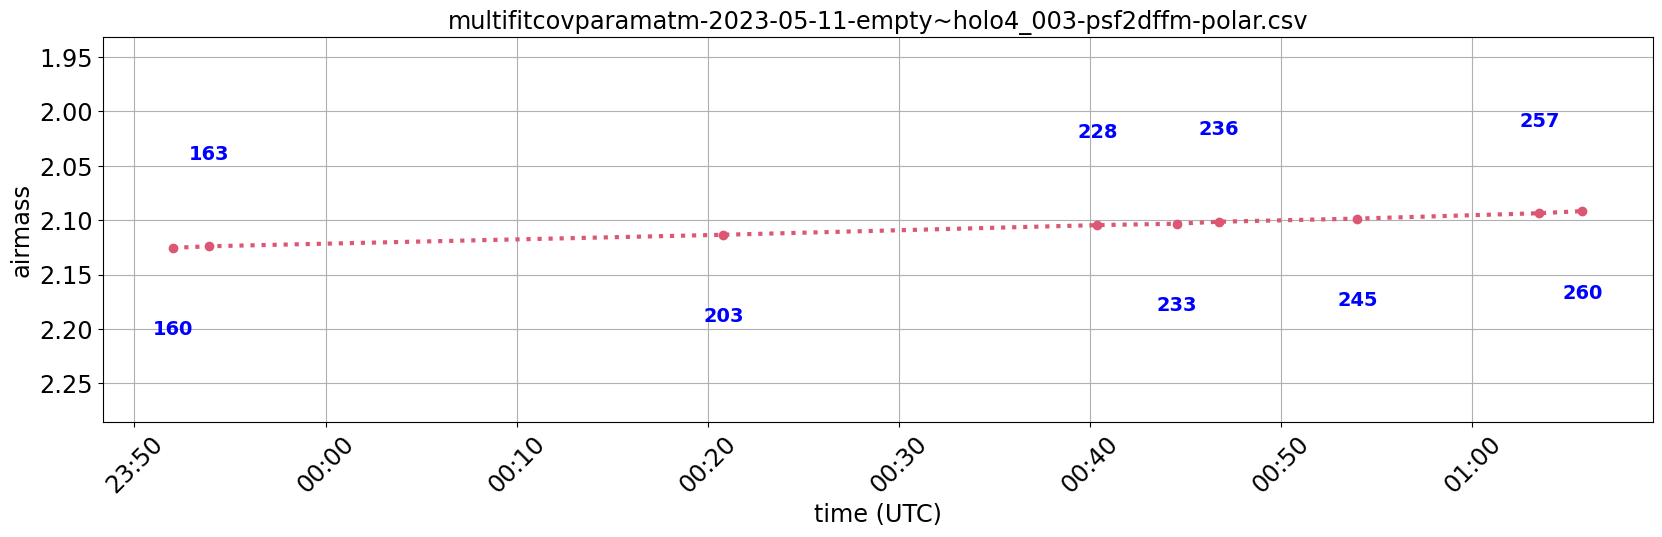

In [17]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

# Function to find pairs

In [18]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print(difftimes)
    all_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            all_pairs.append(idx)
    return all_pairs

## Grey term

### Plot all grey in different figures

In [19]:
hls_colors = sns.color_palette("hls", NF)

In [20]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_63077/426815166.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


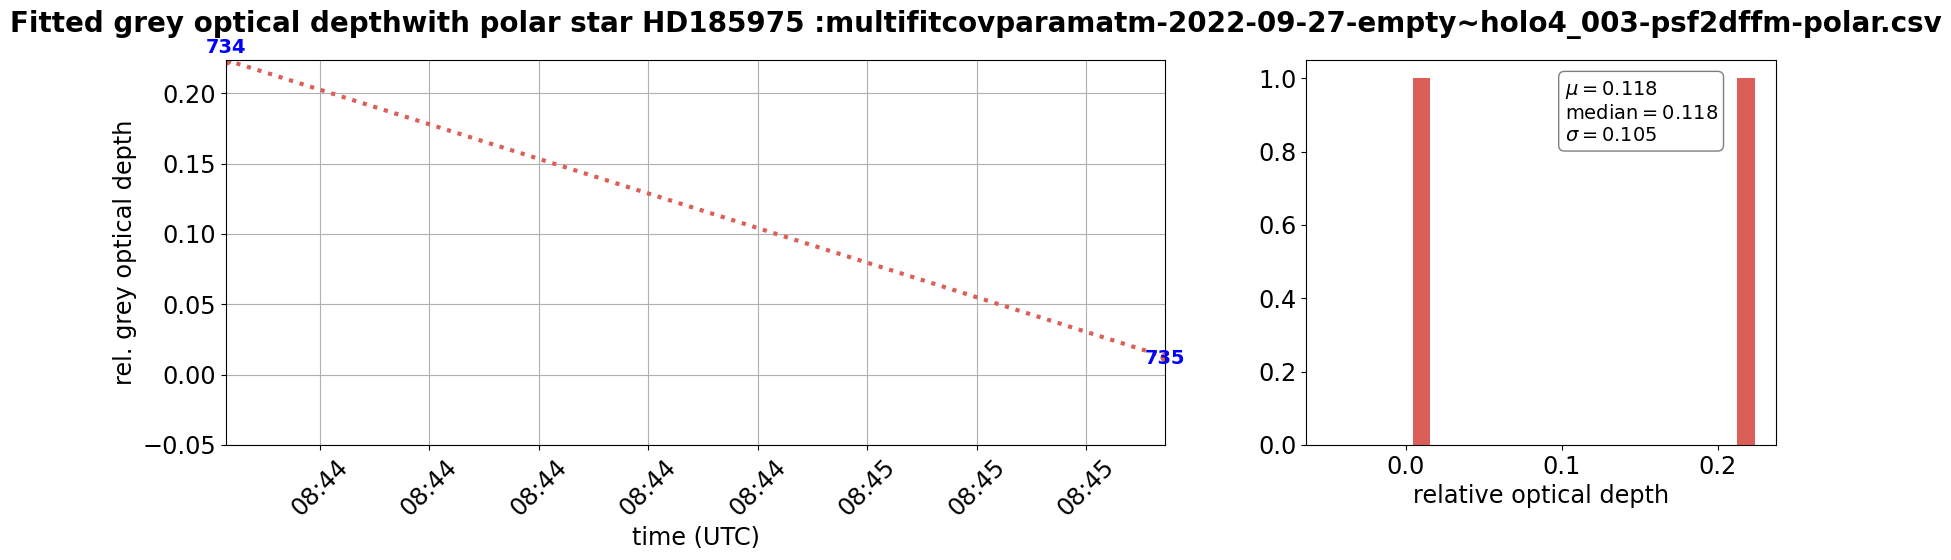

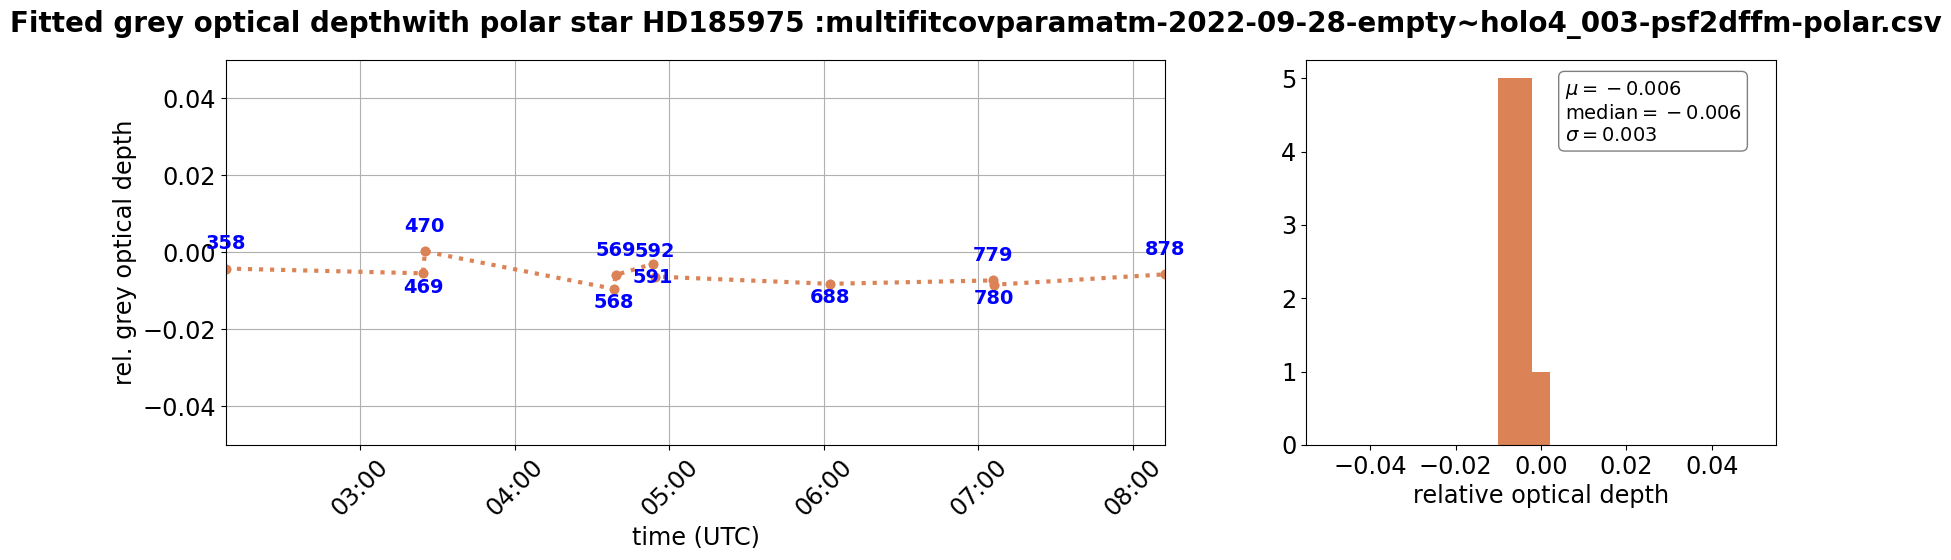

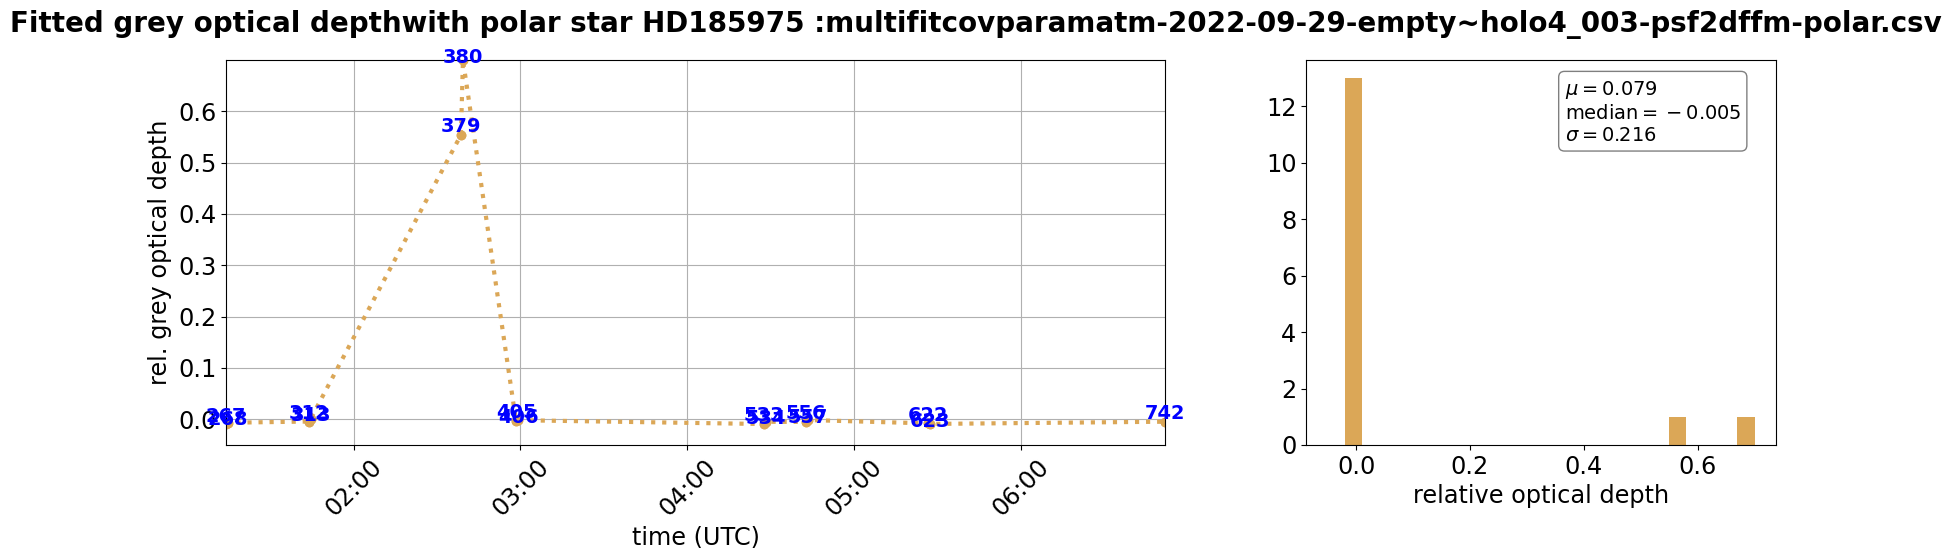

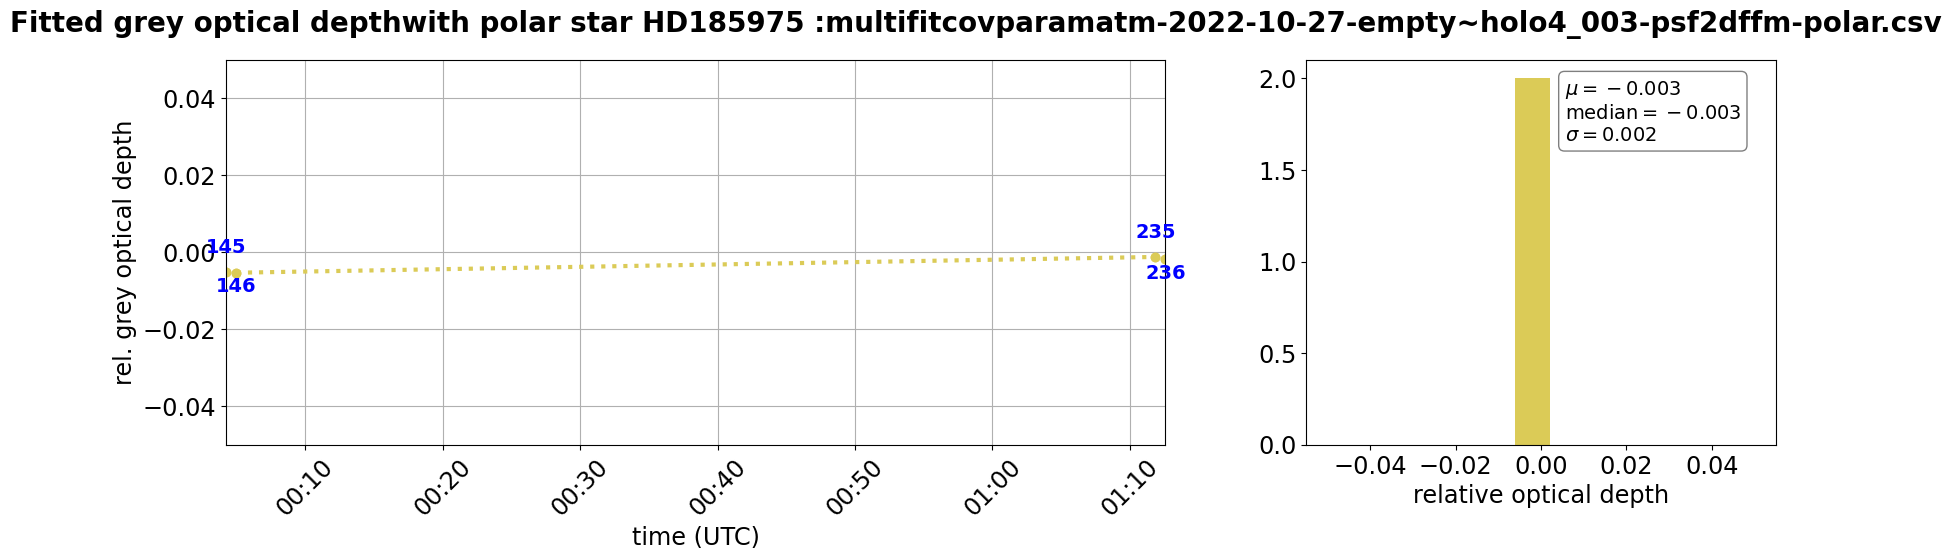

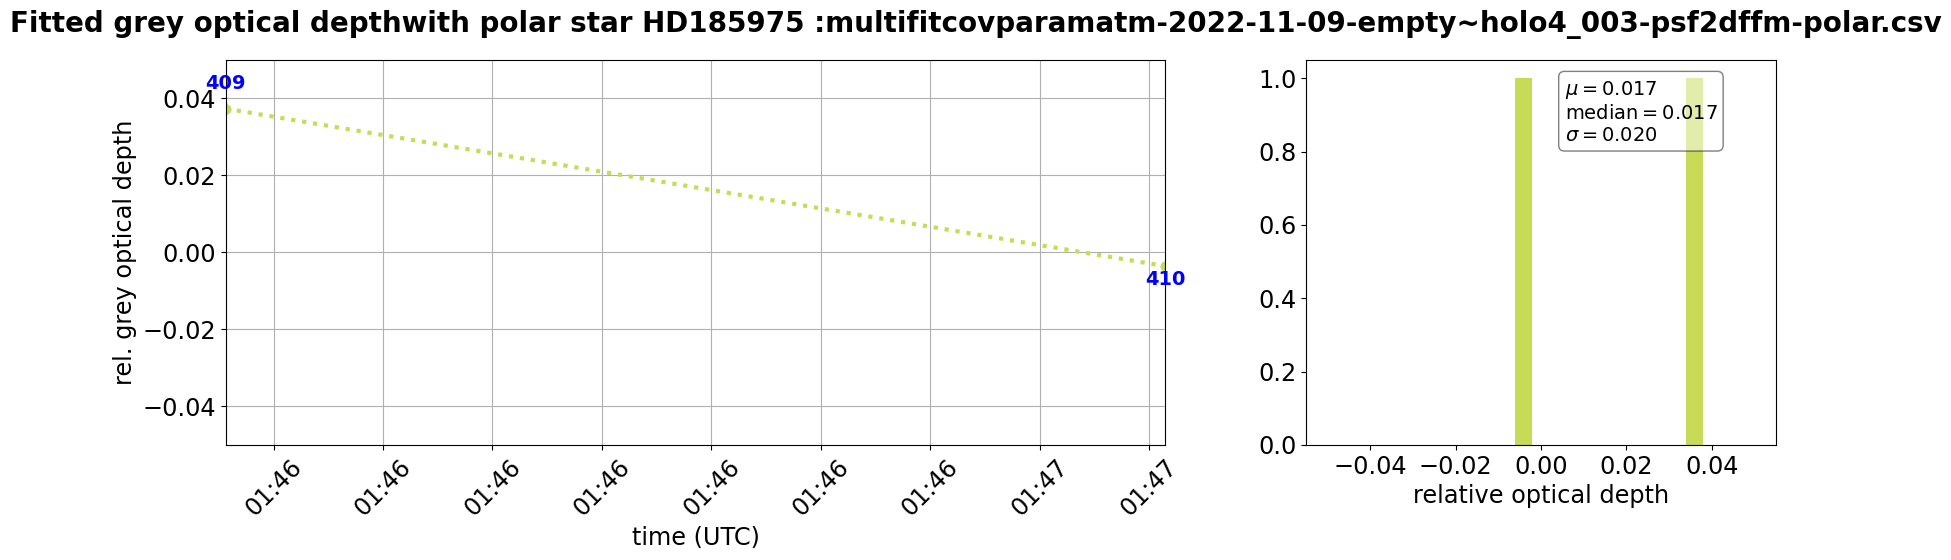

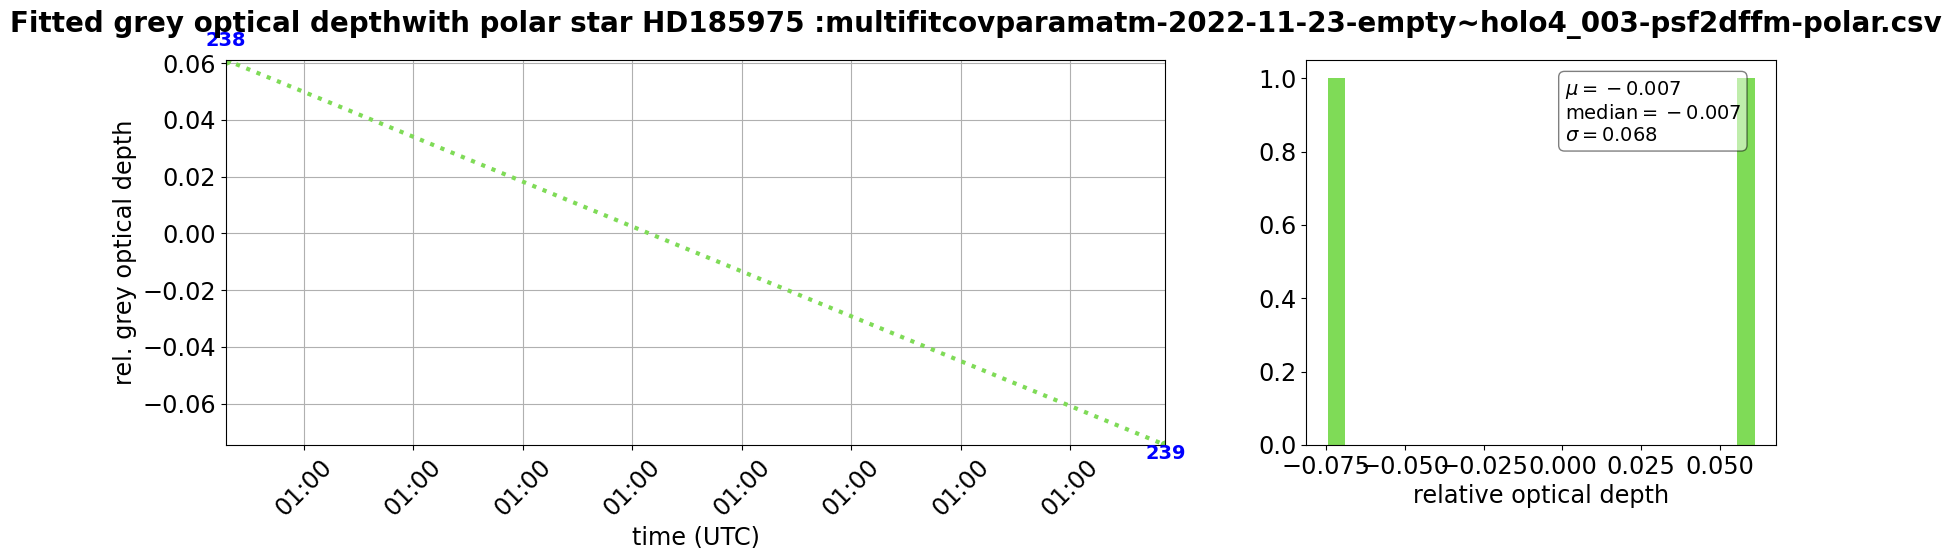

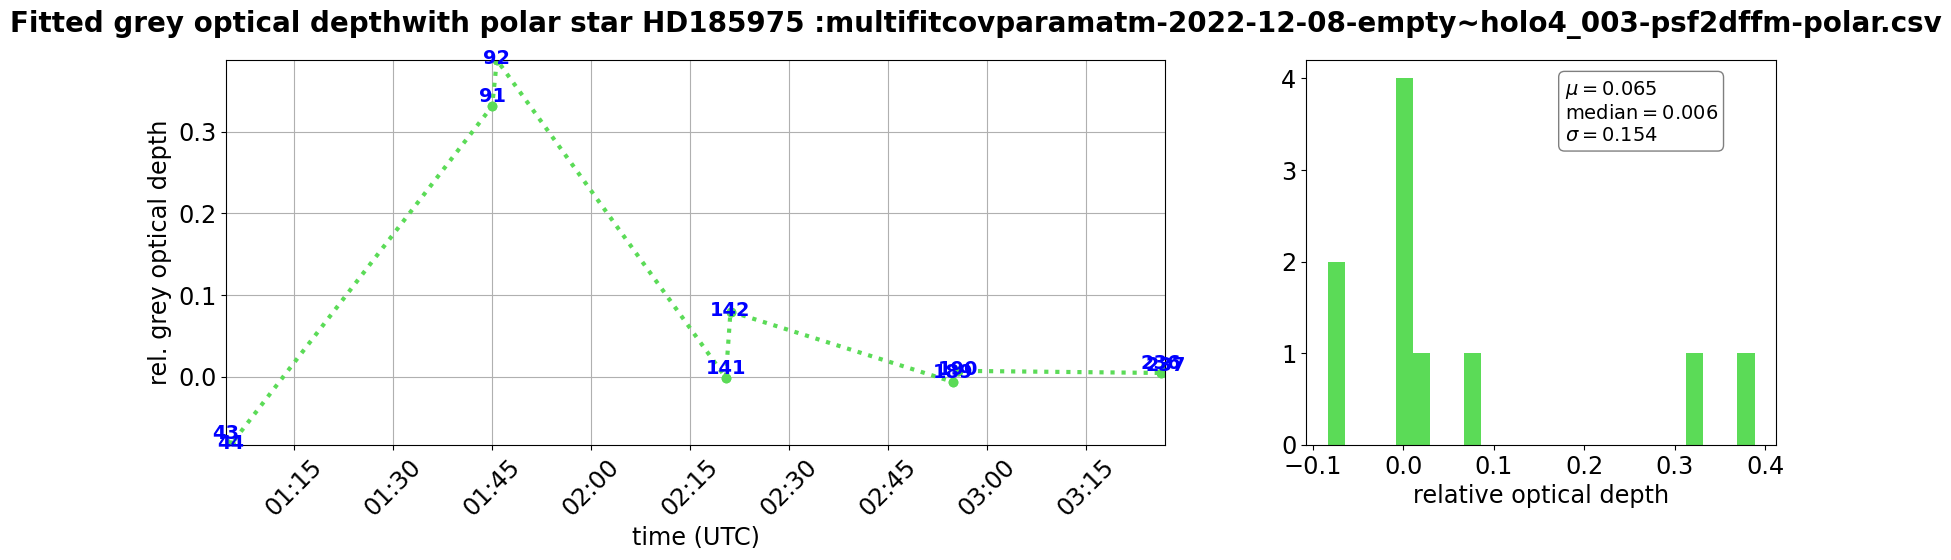

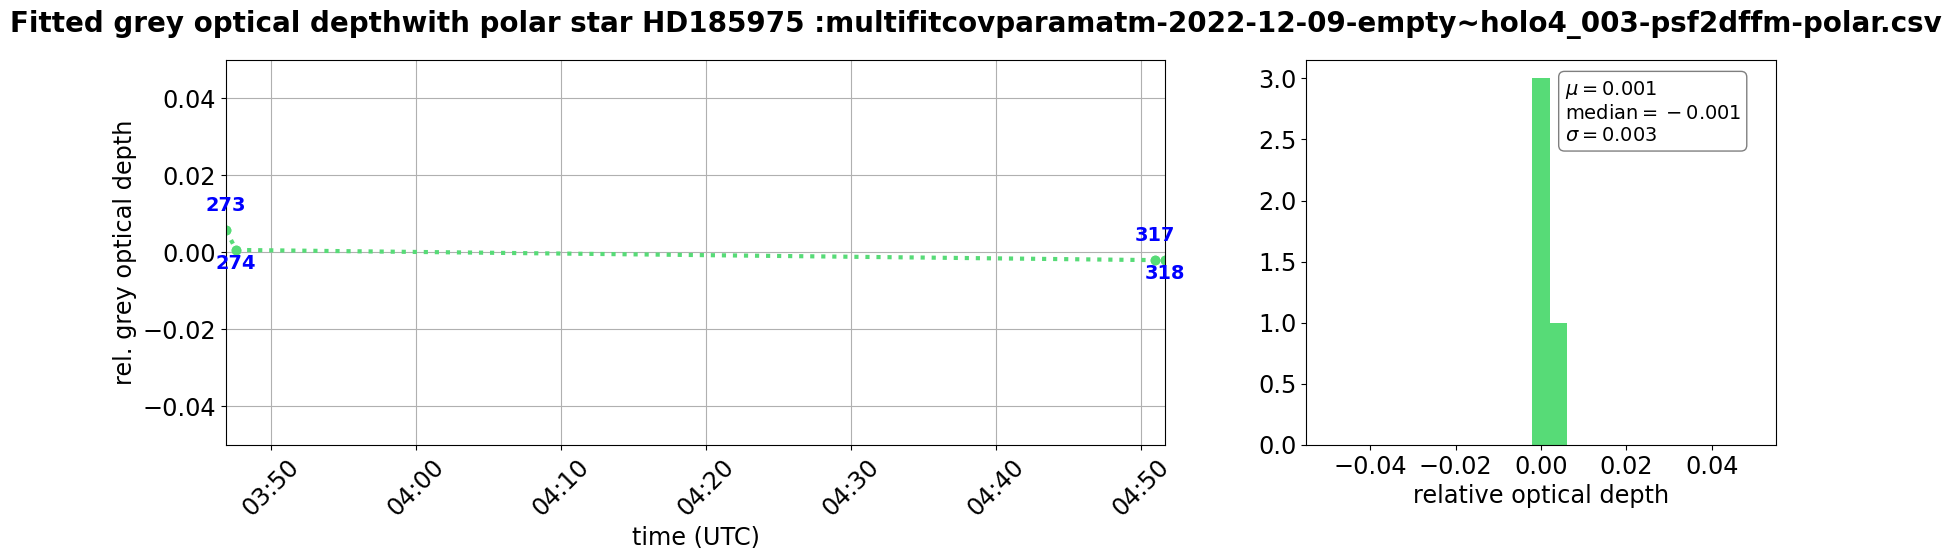

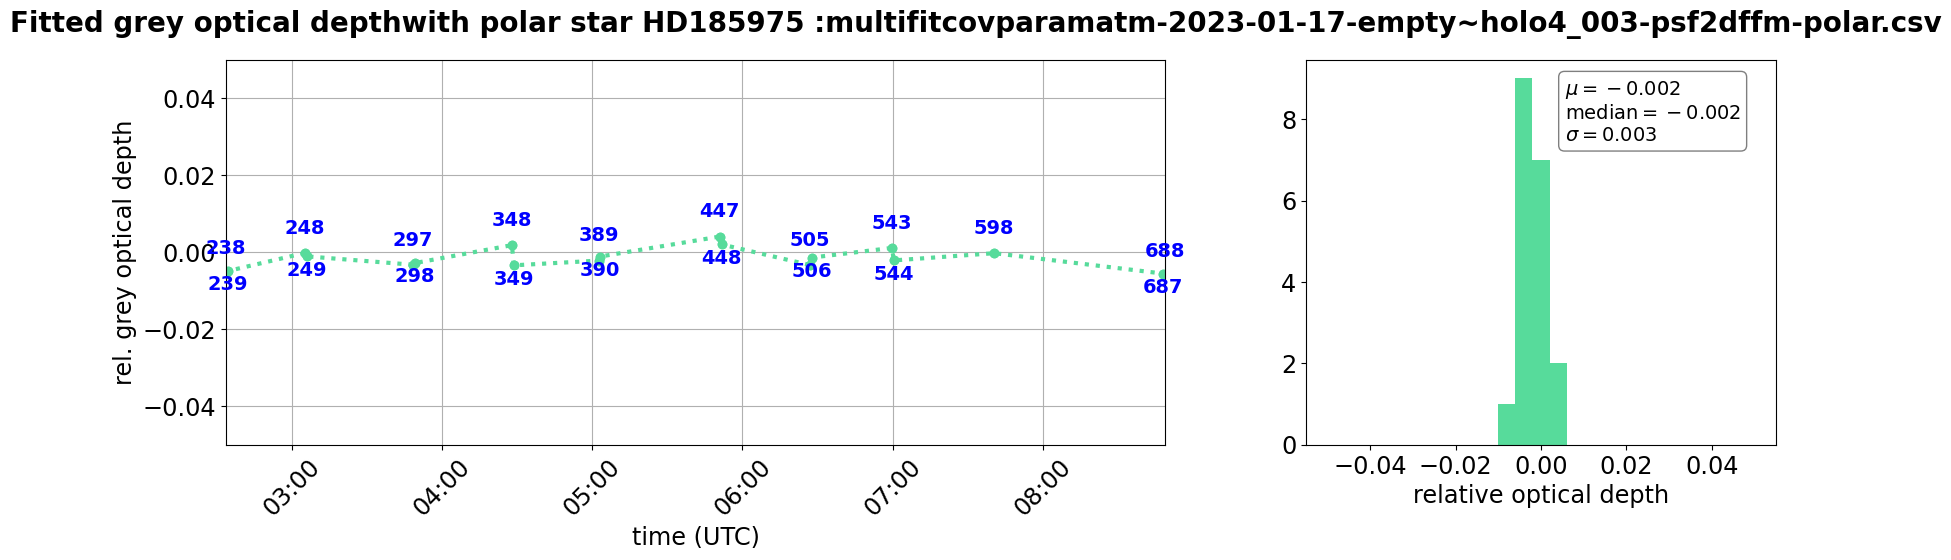

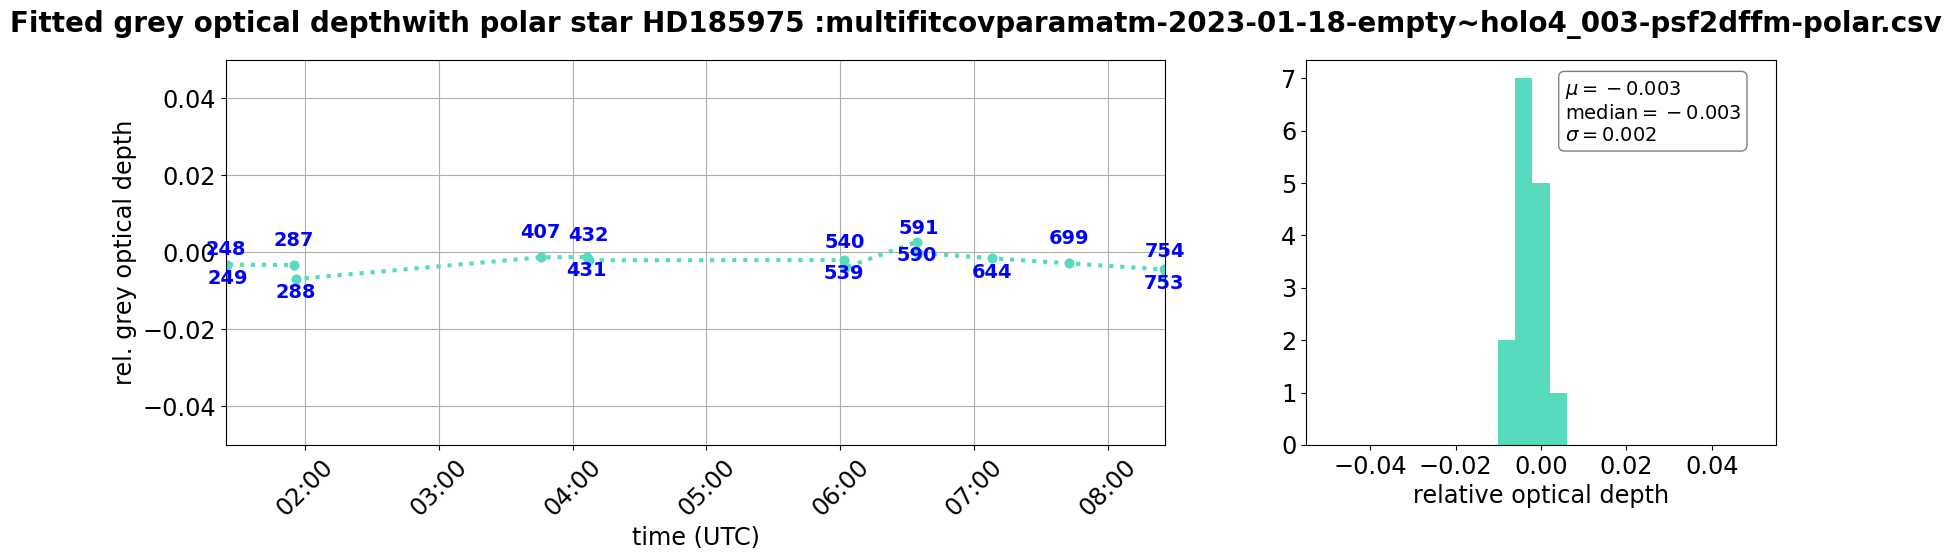

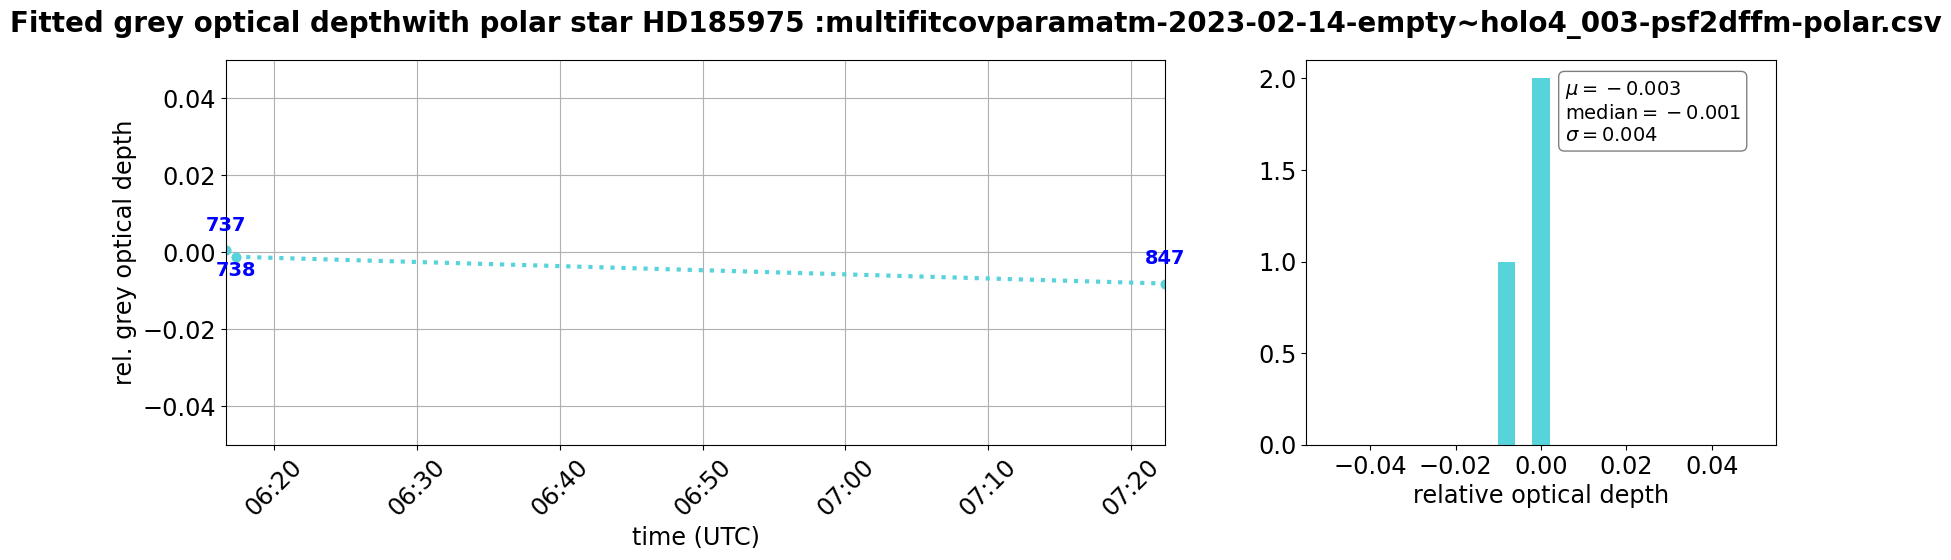

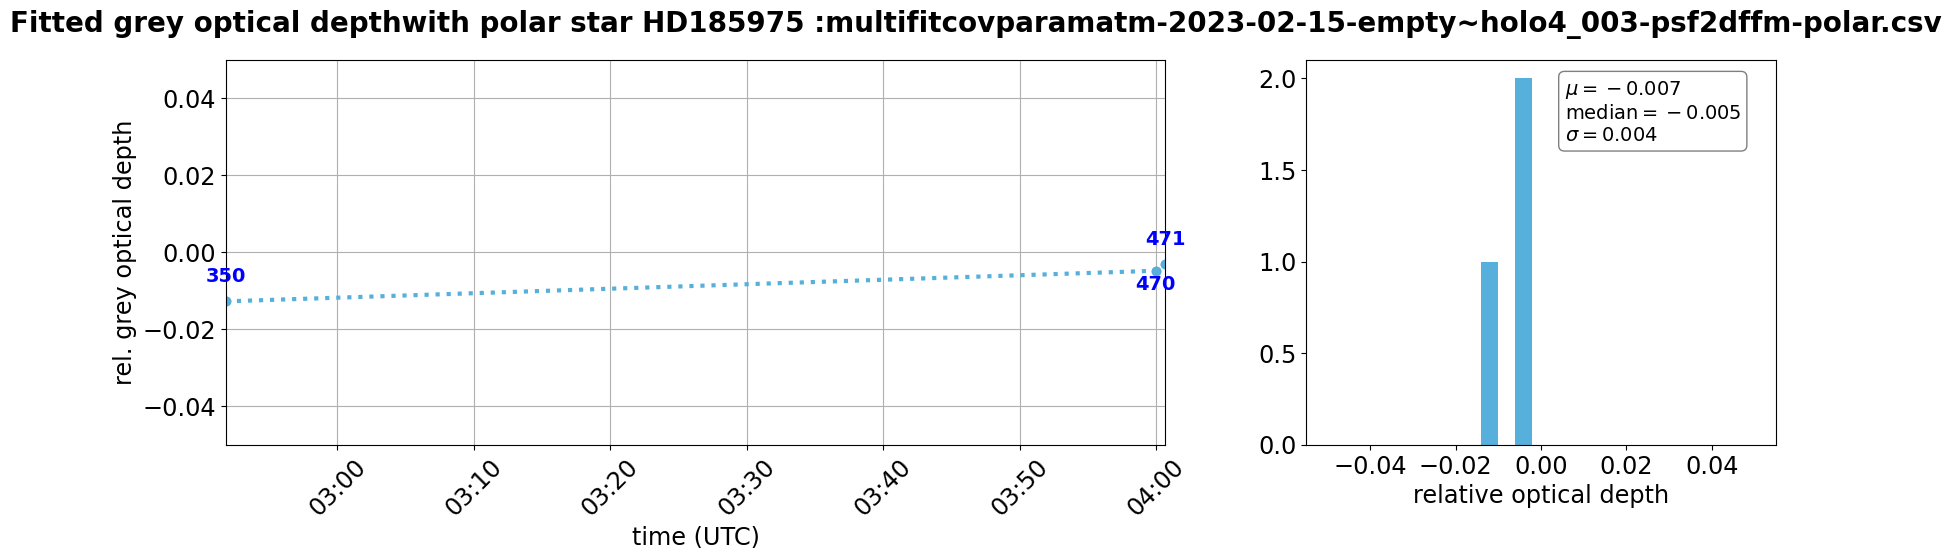

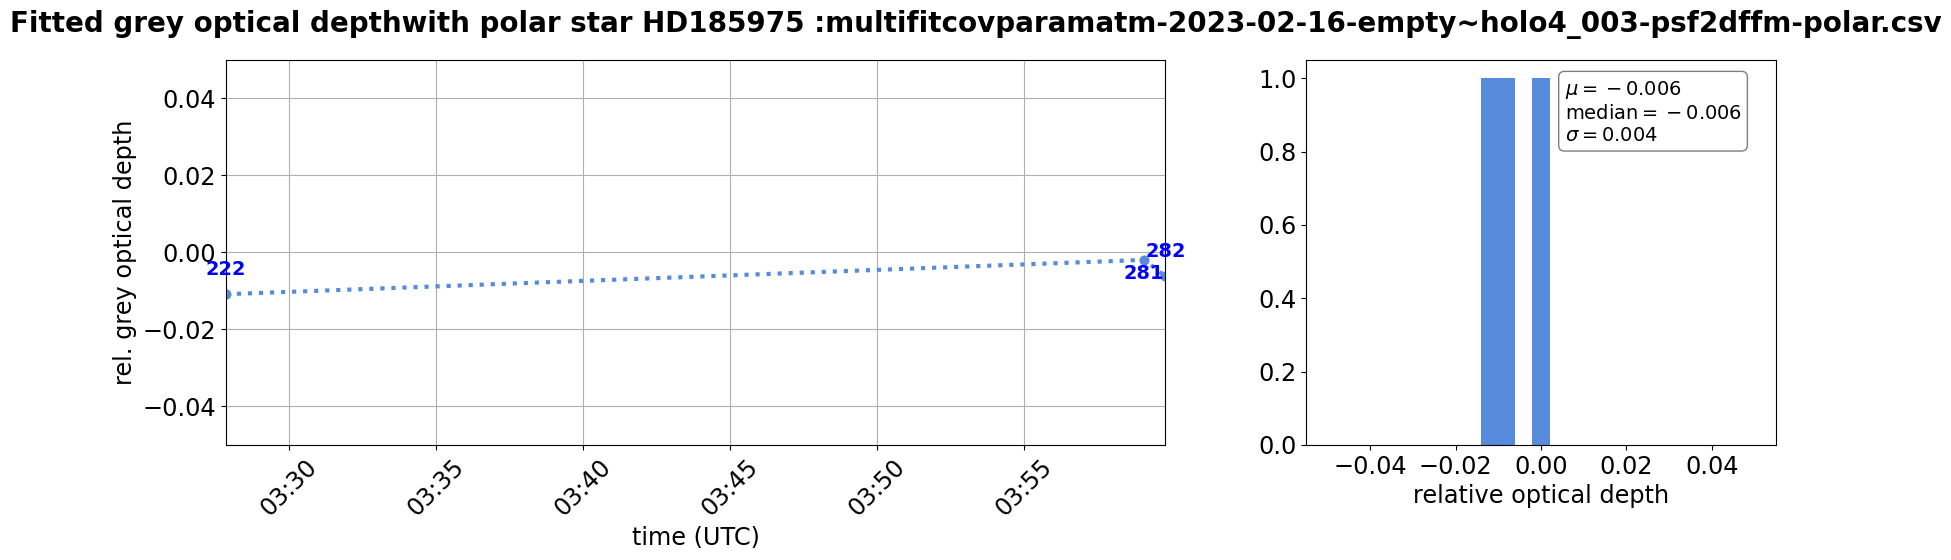

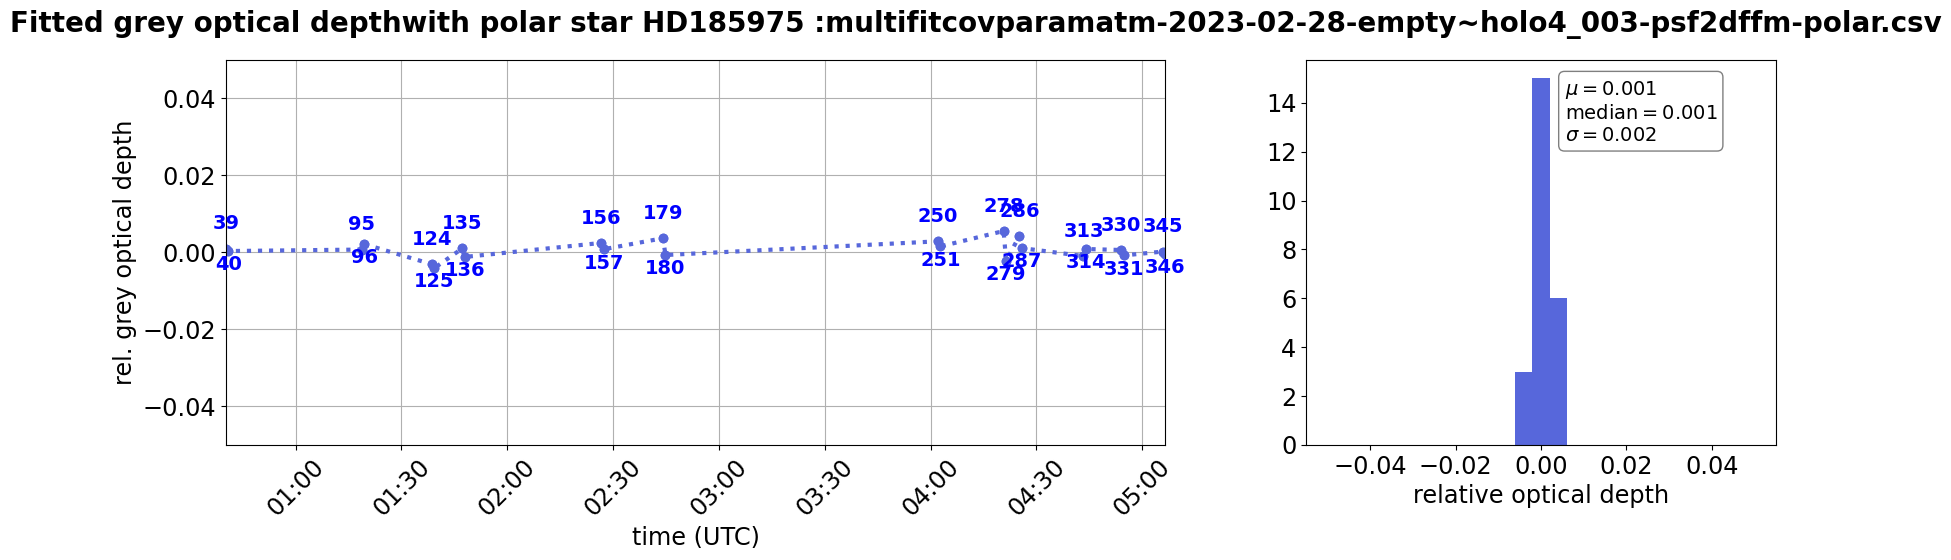

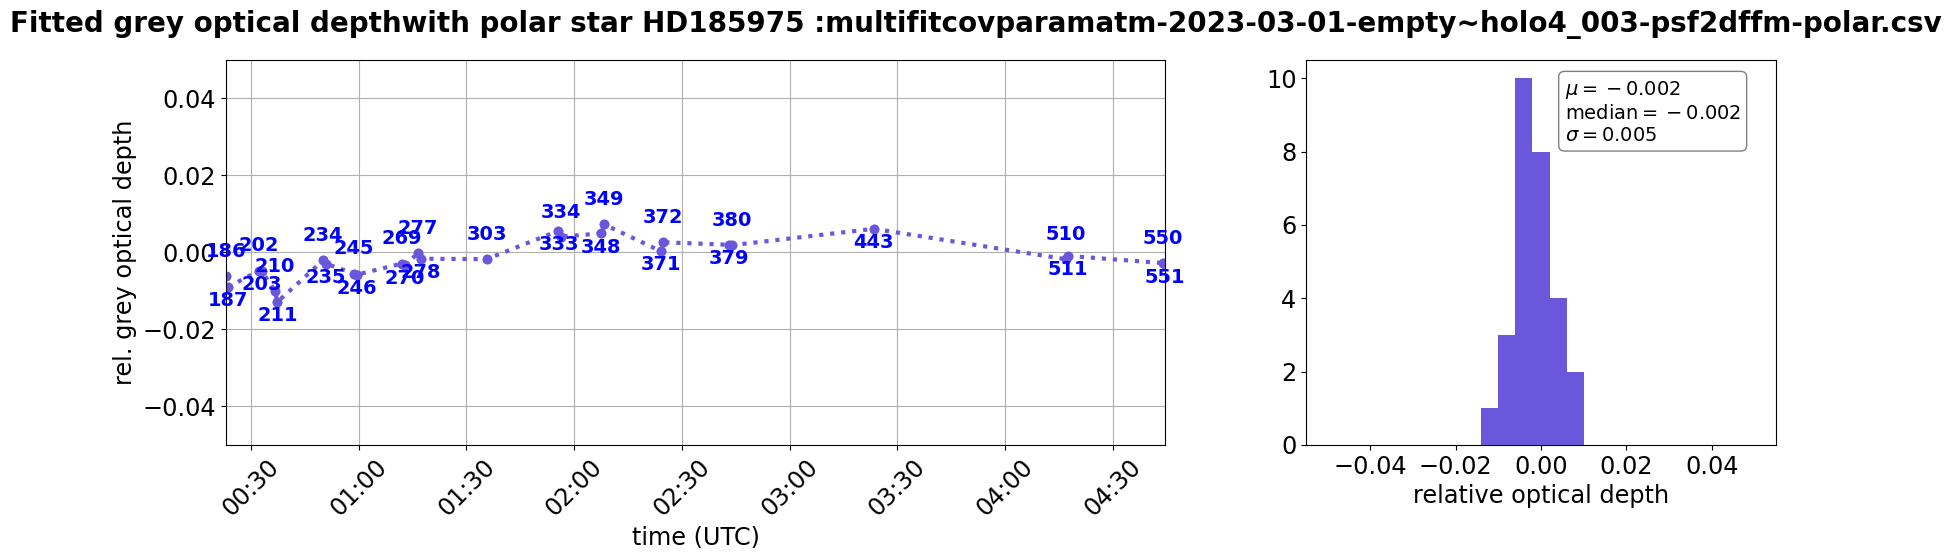

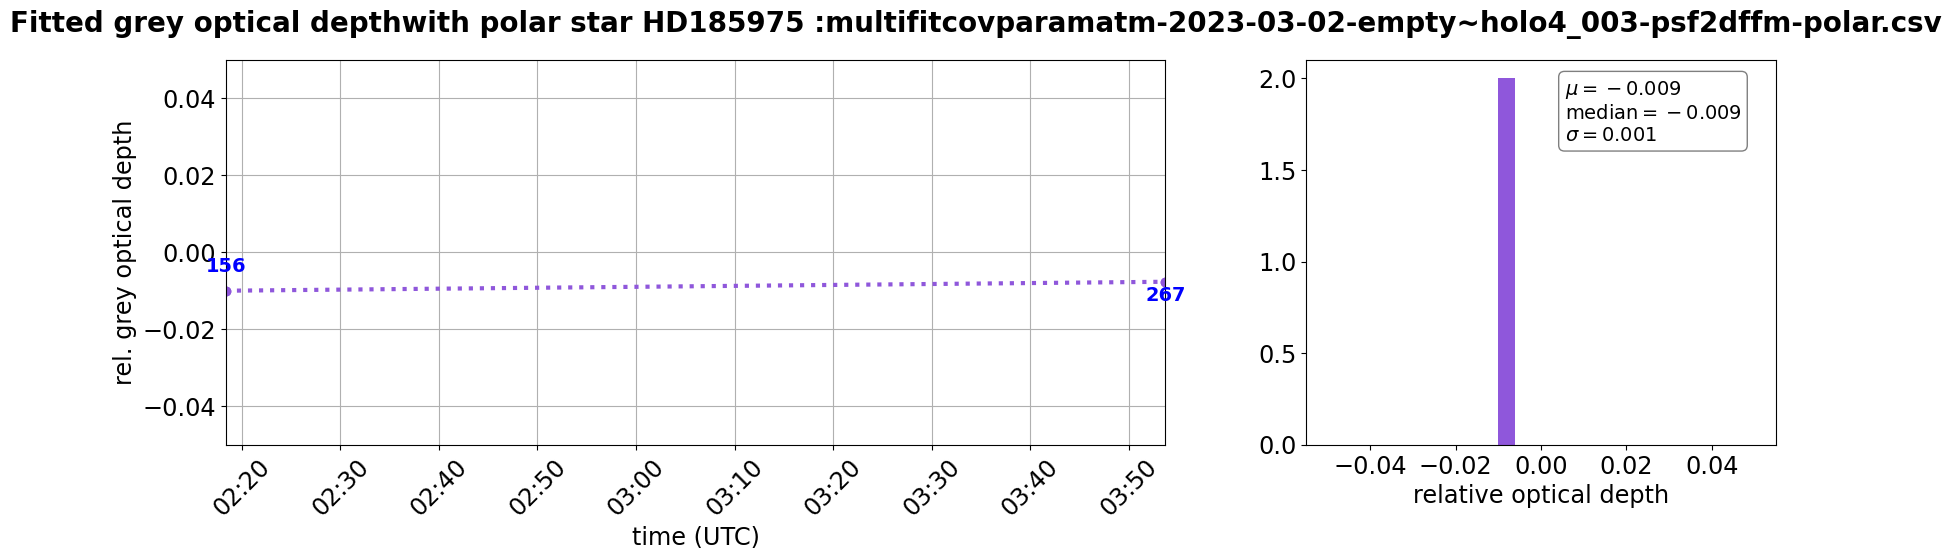

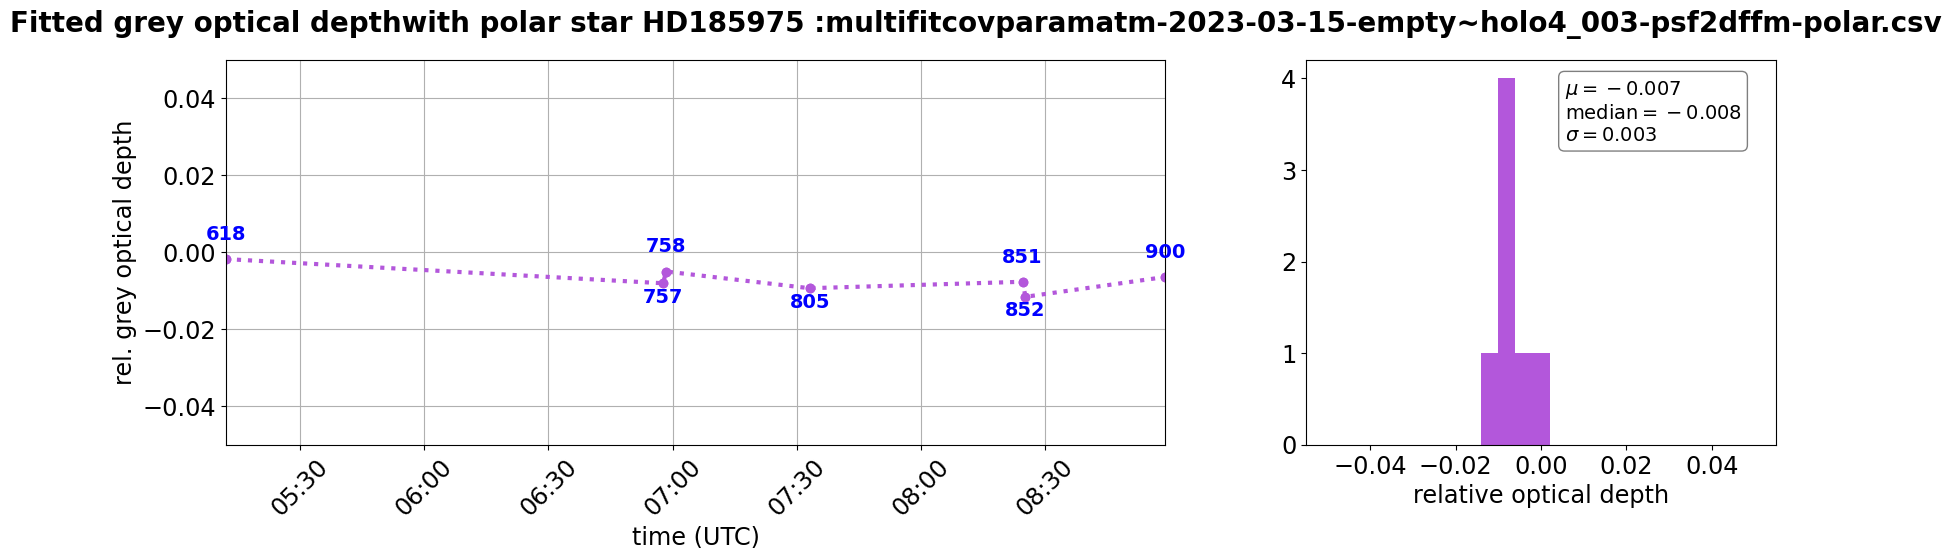

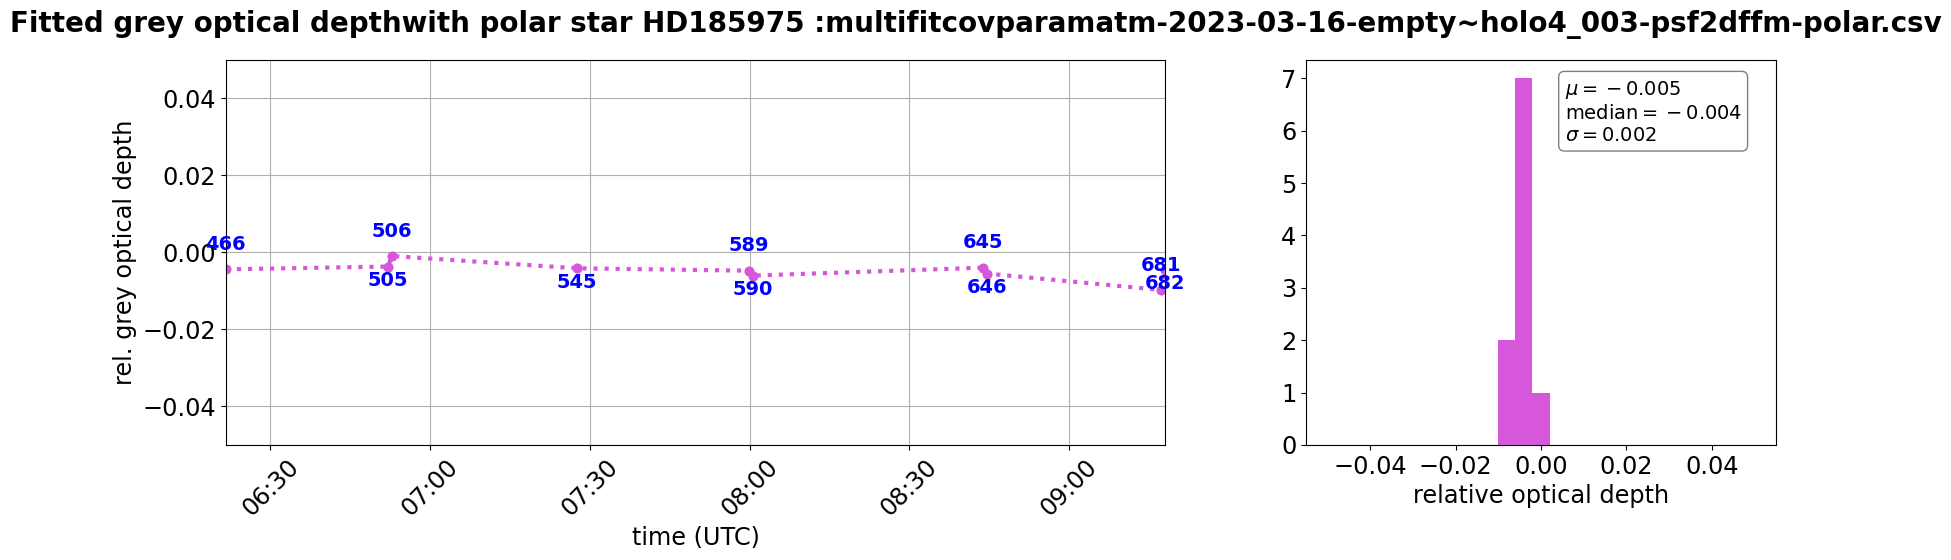

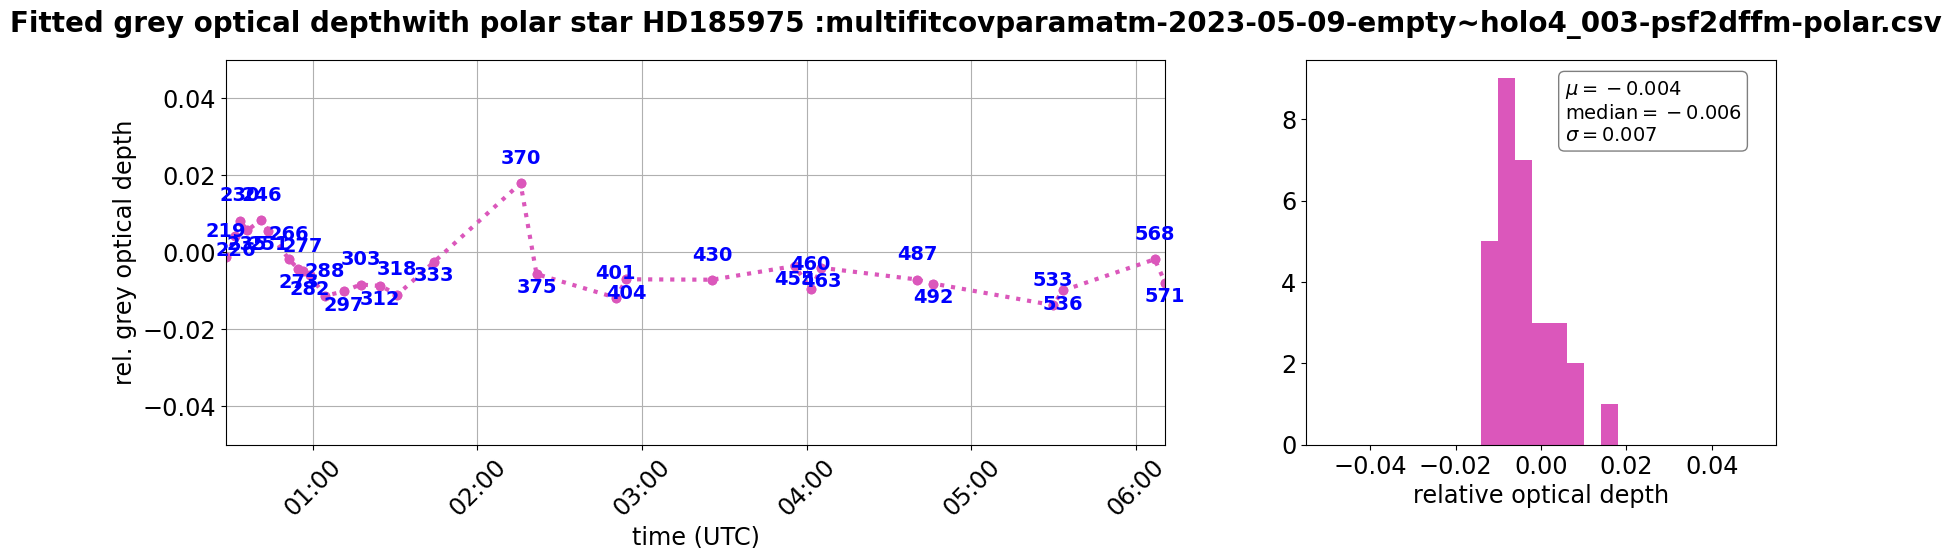

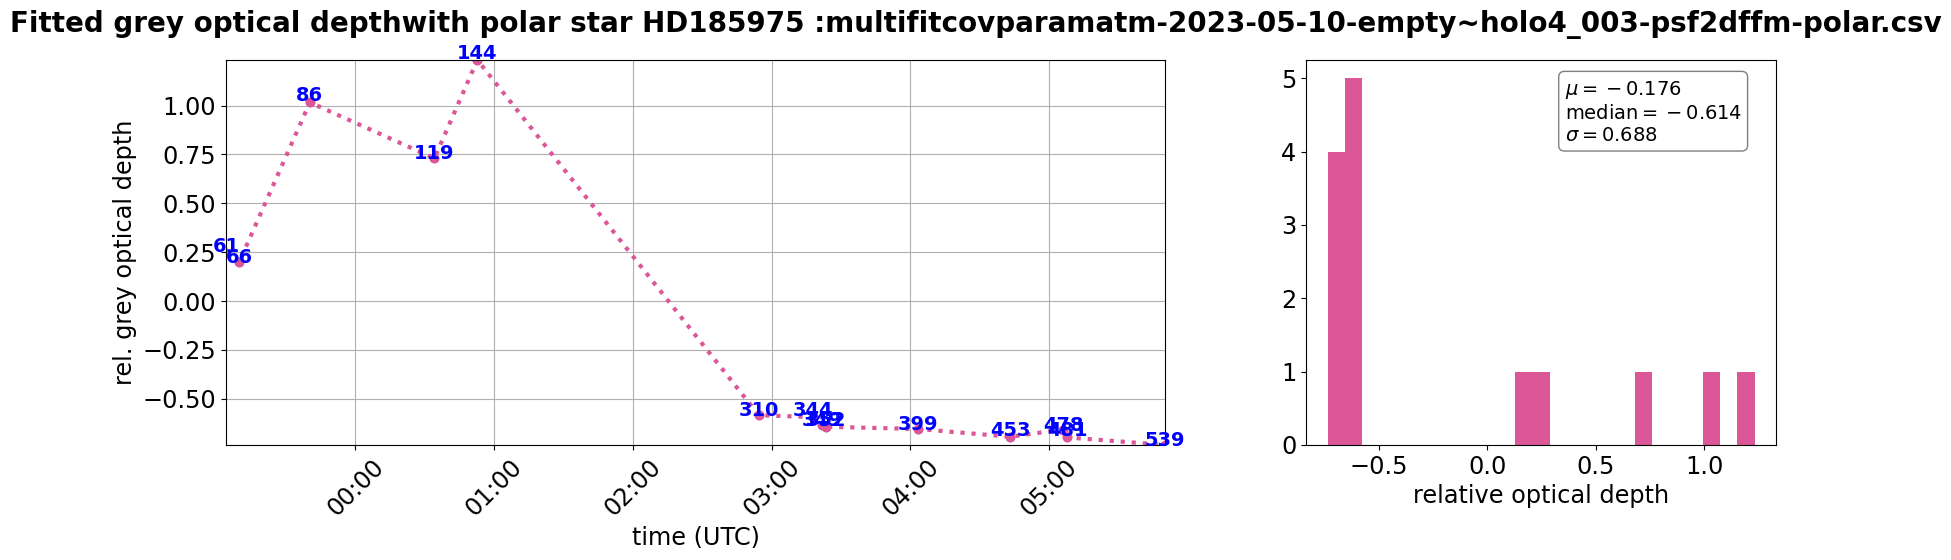

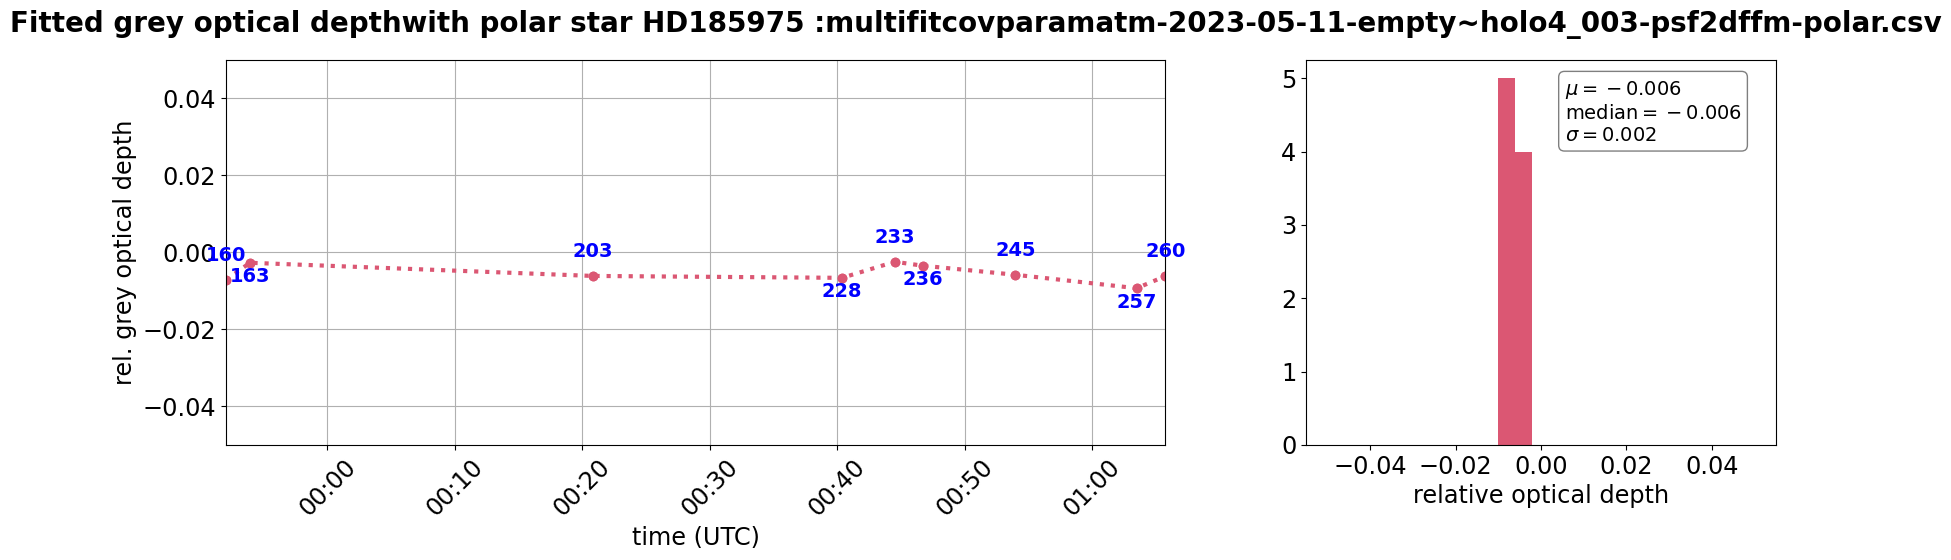

In [21]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    

    
    
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    
    try:
        optdepth_min = optdepth.min()
        optdepth_max = optdepth.max()
    
    except ValueError:  #raised if `y` is empty.
        optdepth_min = -0.05
        optdepth_max = 0.05
    

    
    if np.abs(optdepth_min) < 0.05:
        optdepth_min = -0.05
        
    if np.abs(optdepth_max) < 0.05:
        optdepth_max = 0.05
         
    
    

    N= len(numbers)
    if N<2 or len(optdepth)<2 :
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 0.005

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.set_ylim(optdepth.min()-2*y_shift,optdepth.max()+2*y_shift)
    ax.set_xlim(start,end)
    
    ax.grid()
    ax.set_ylim(optdepth_min,optdepth_max)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], optdepth[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(optdepth_min,optdepth_max),facecolor=hls_colors[idx])
    ax.set_xlabel("relative optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma =optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted grey optical depthwith polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted grey optical depth with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_63077/3285448955.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


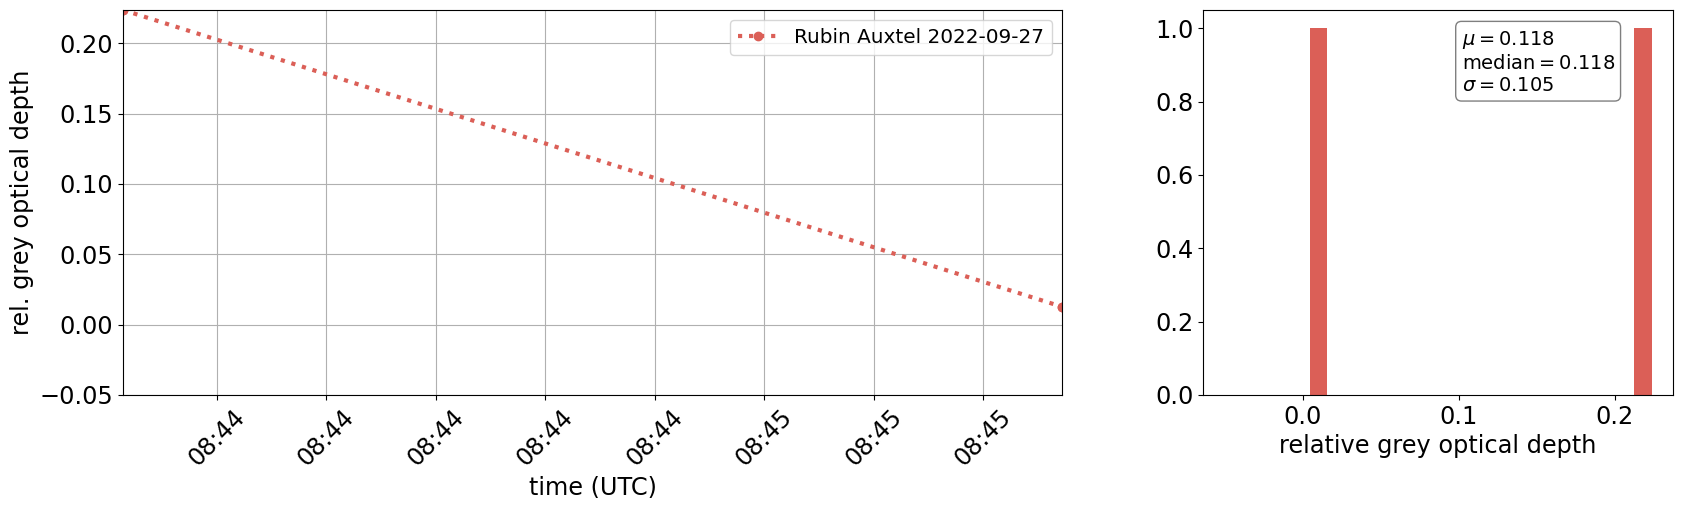

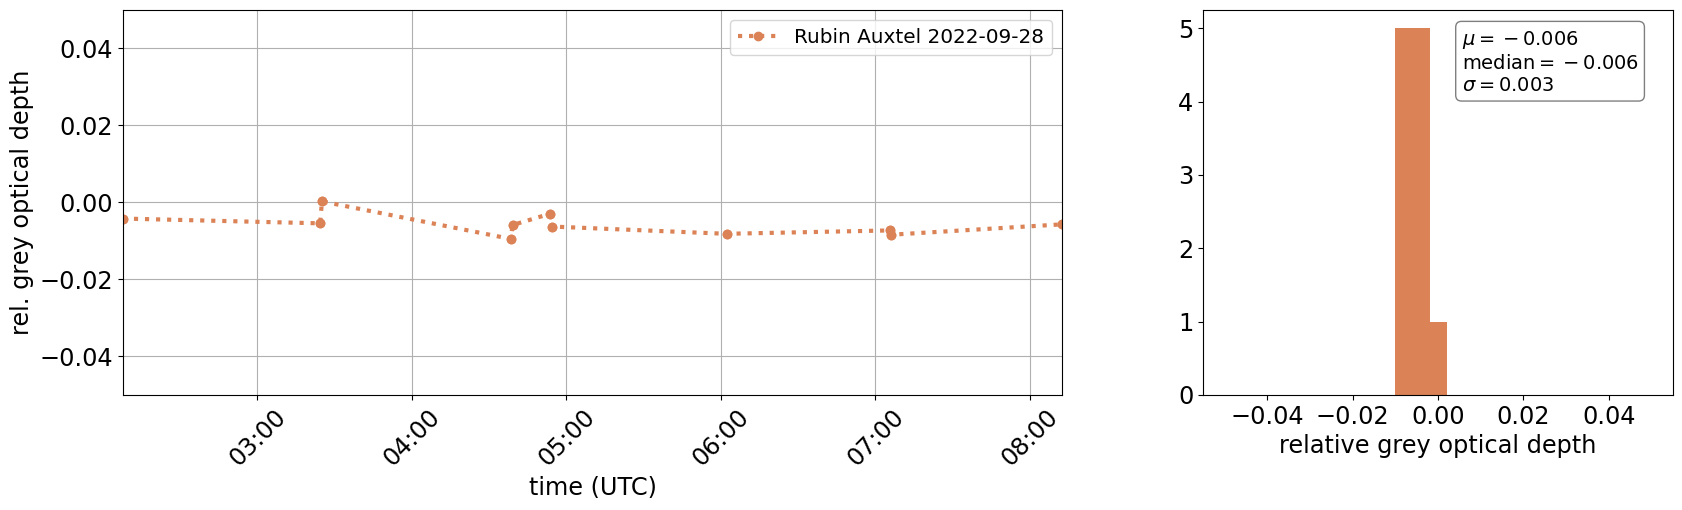

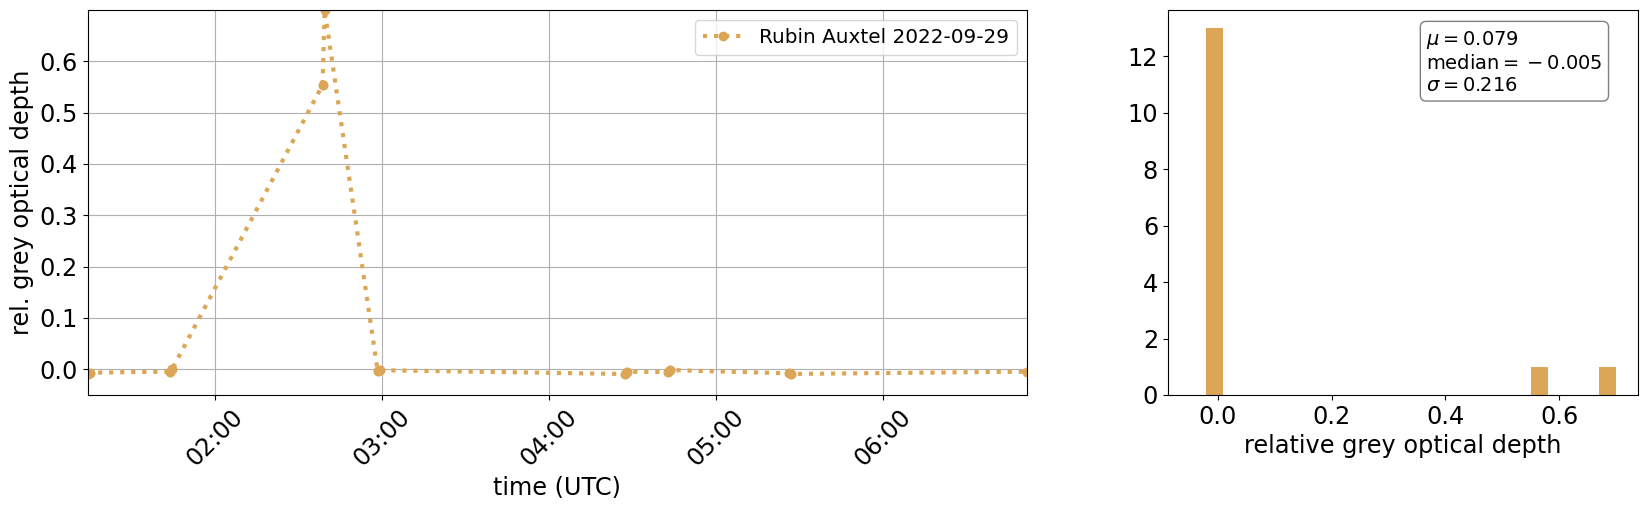

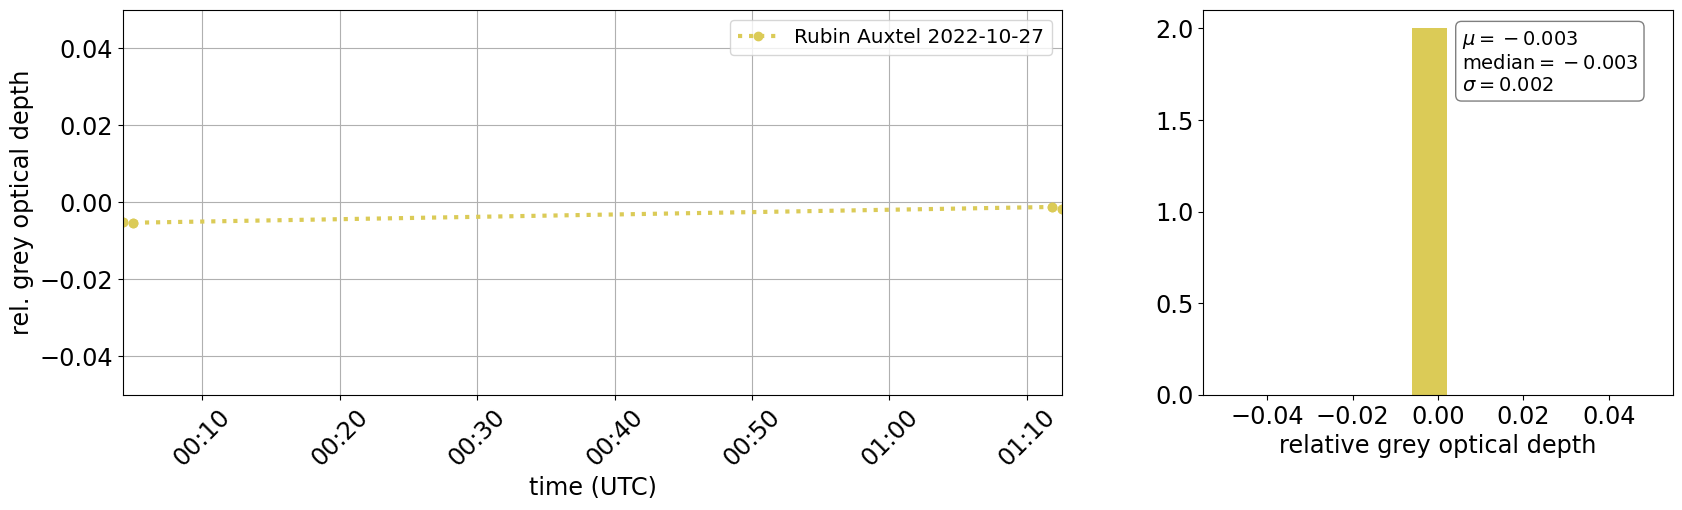

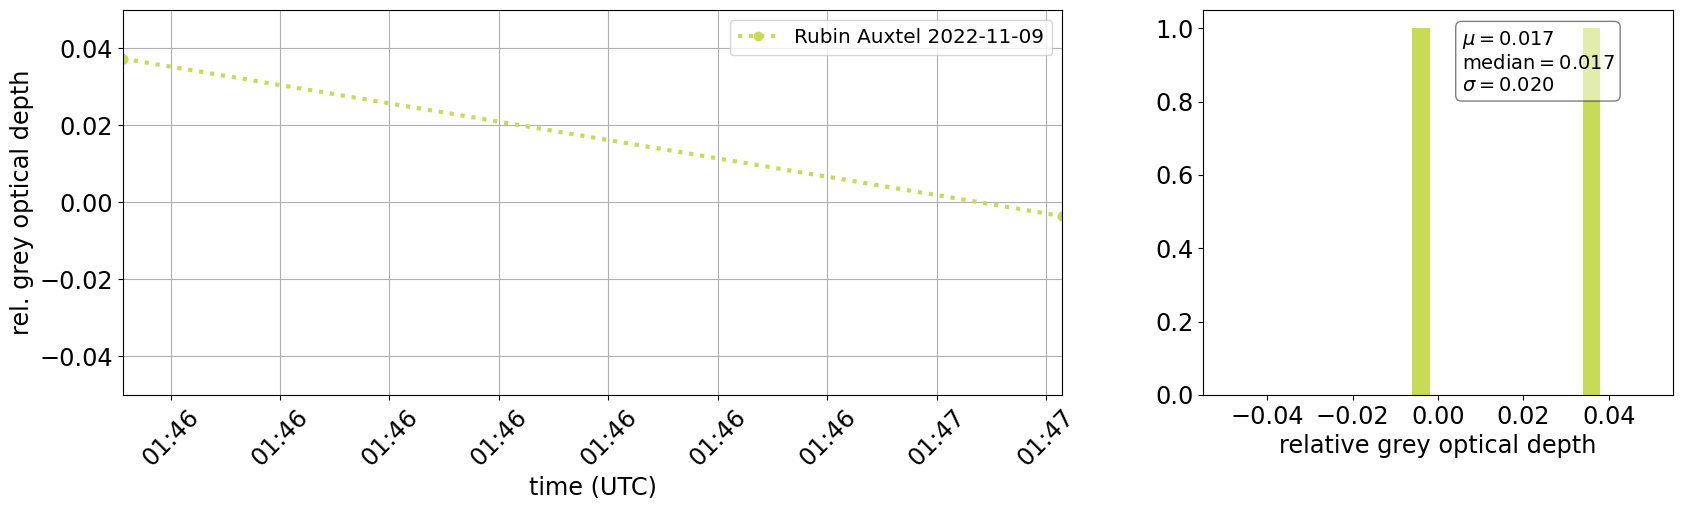

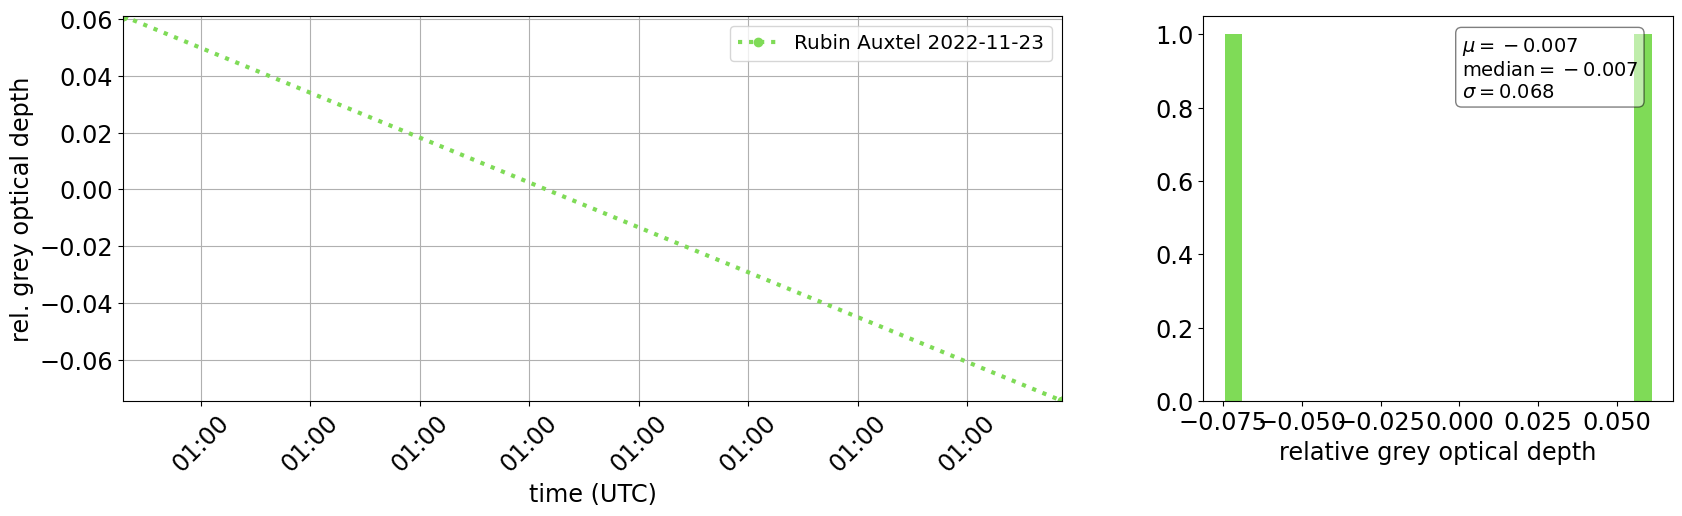

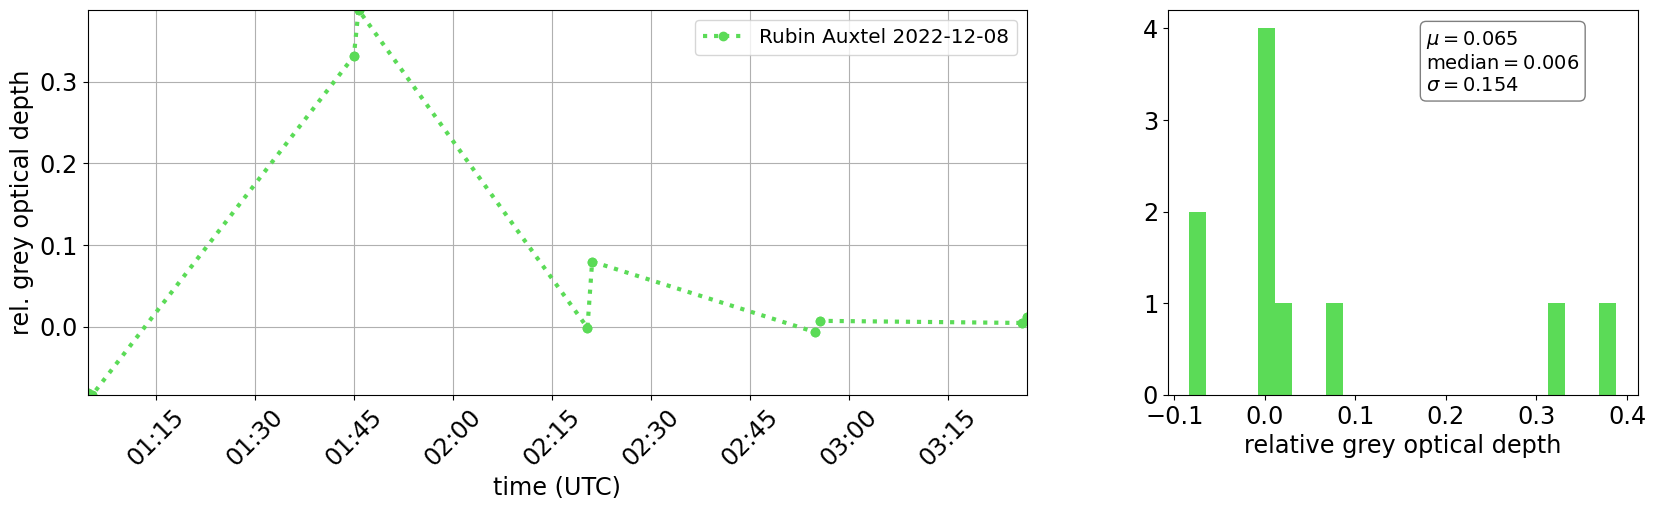

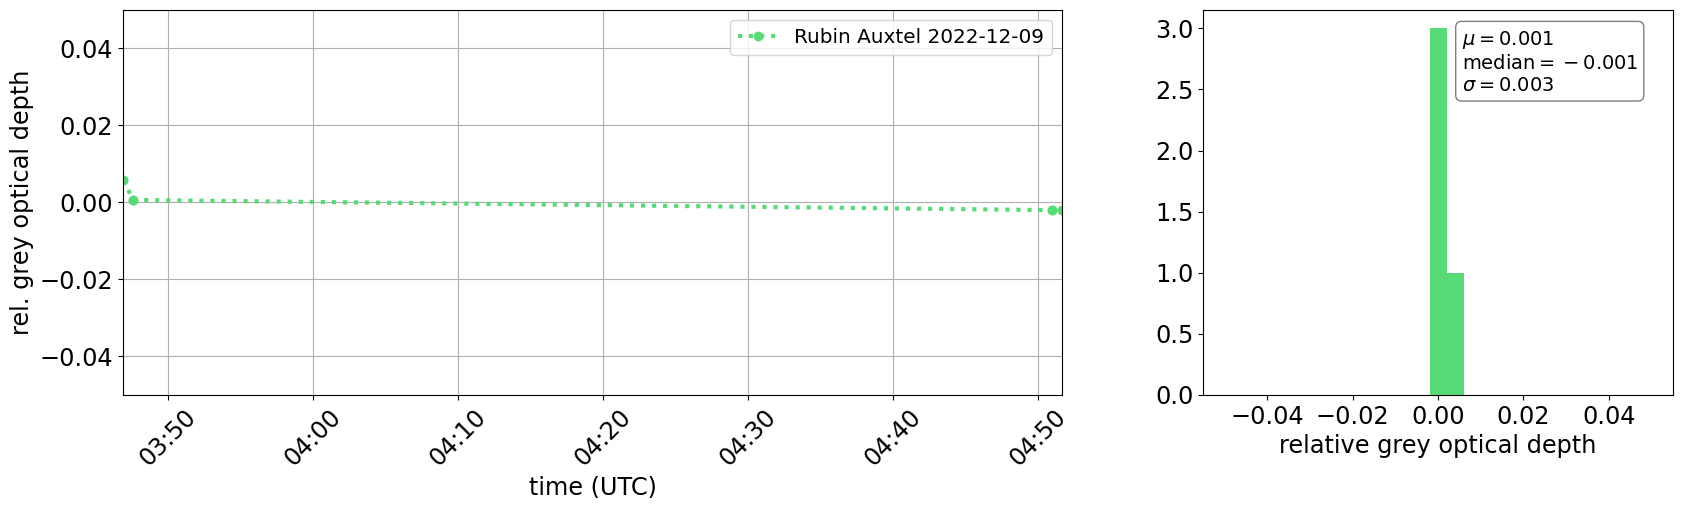

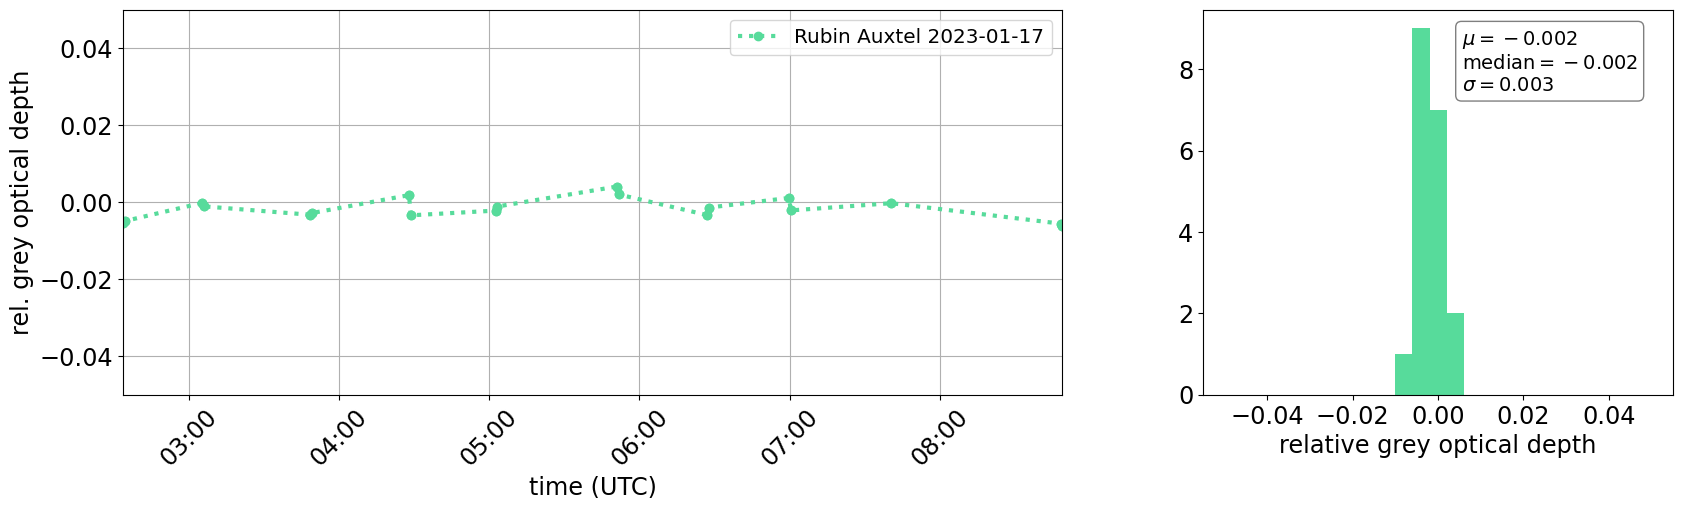

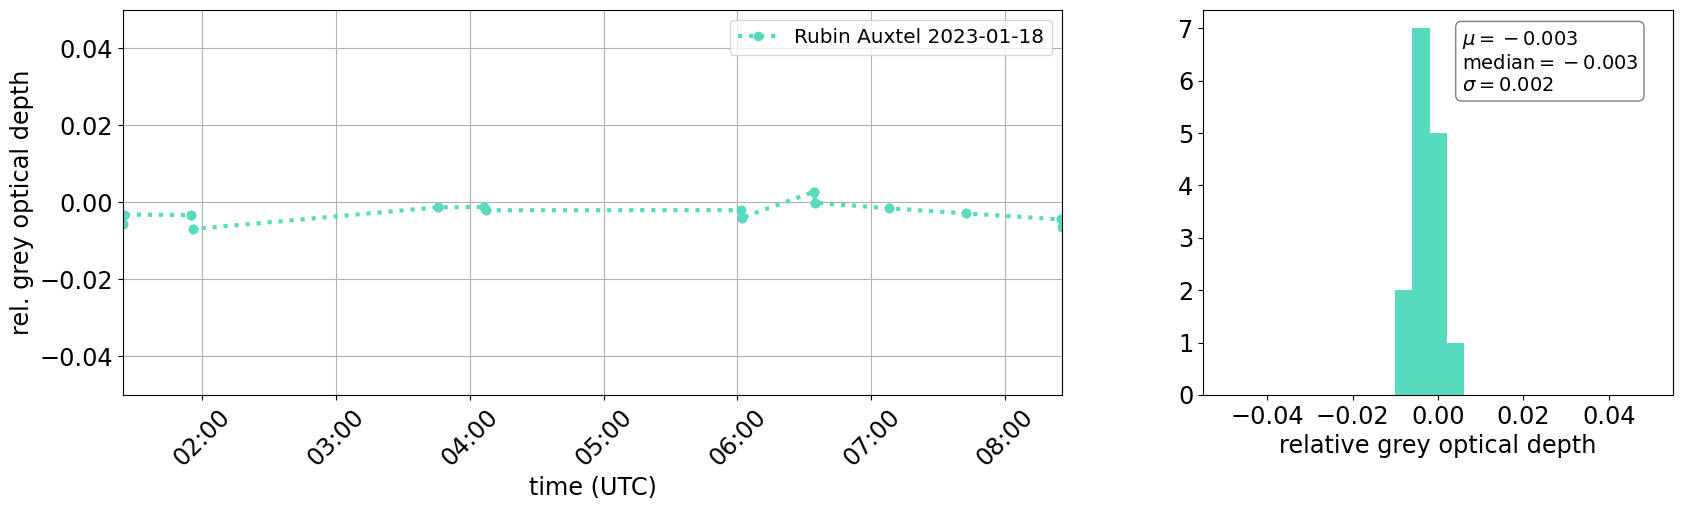

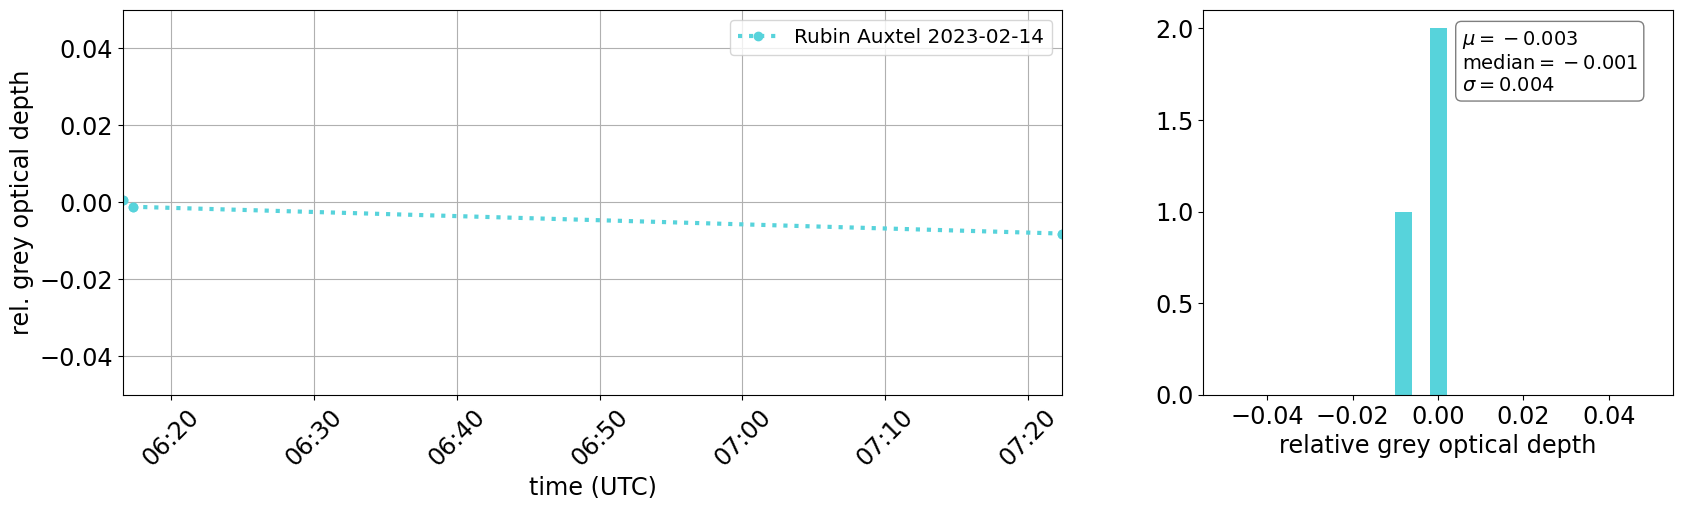

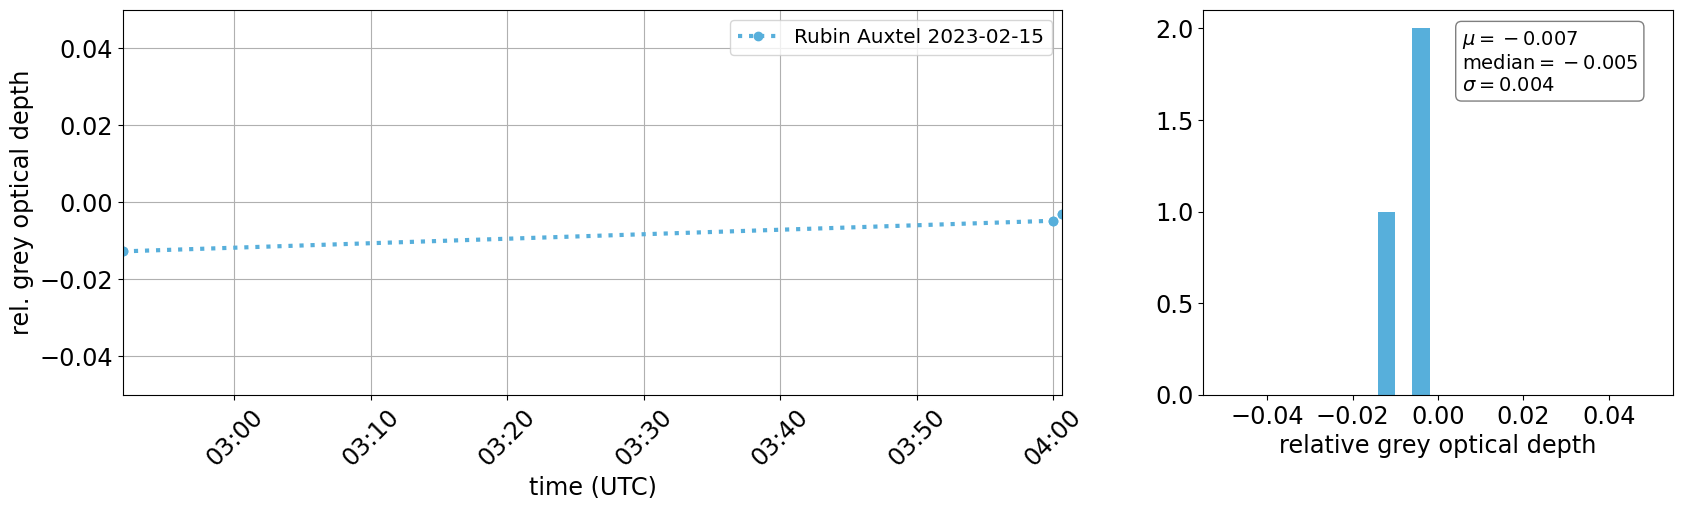

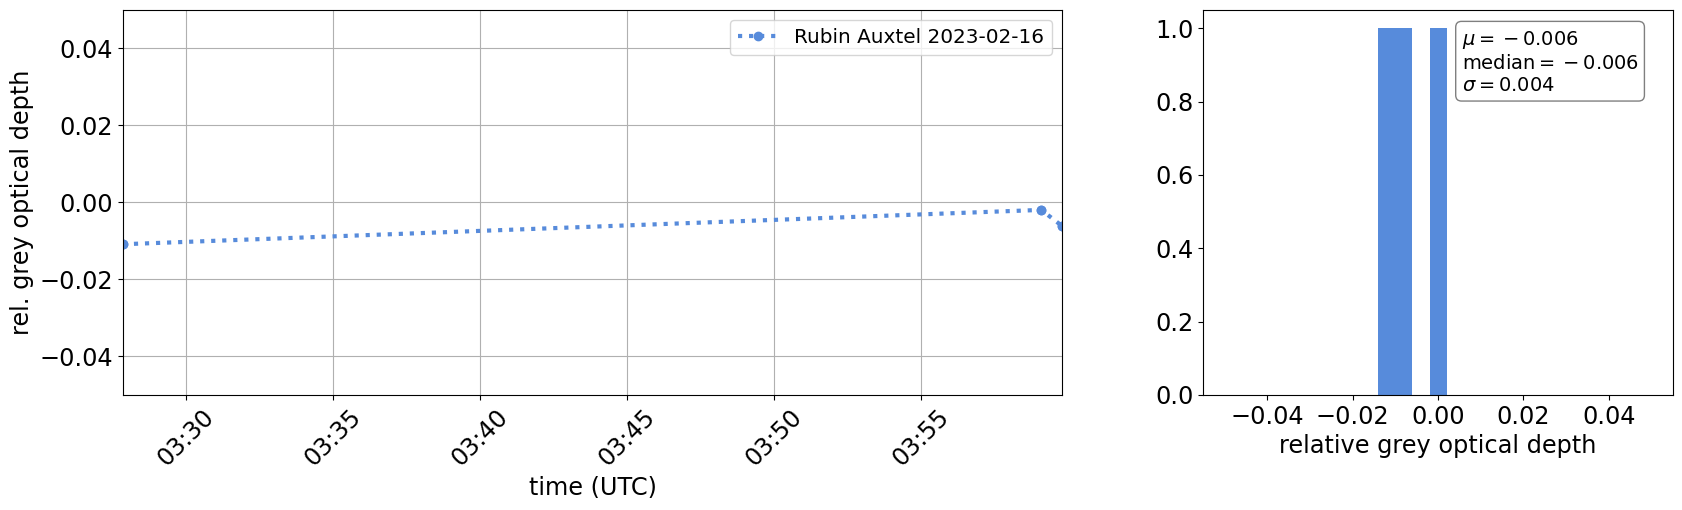

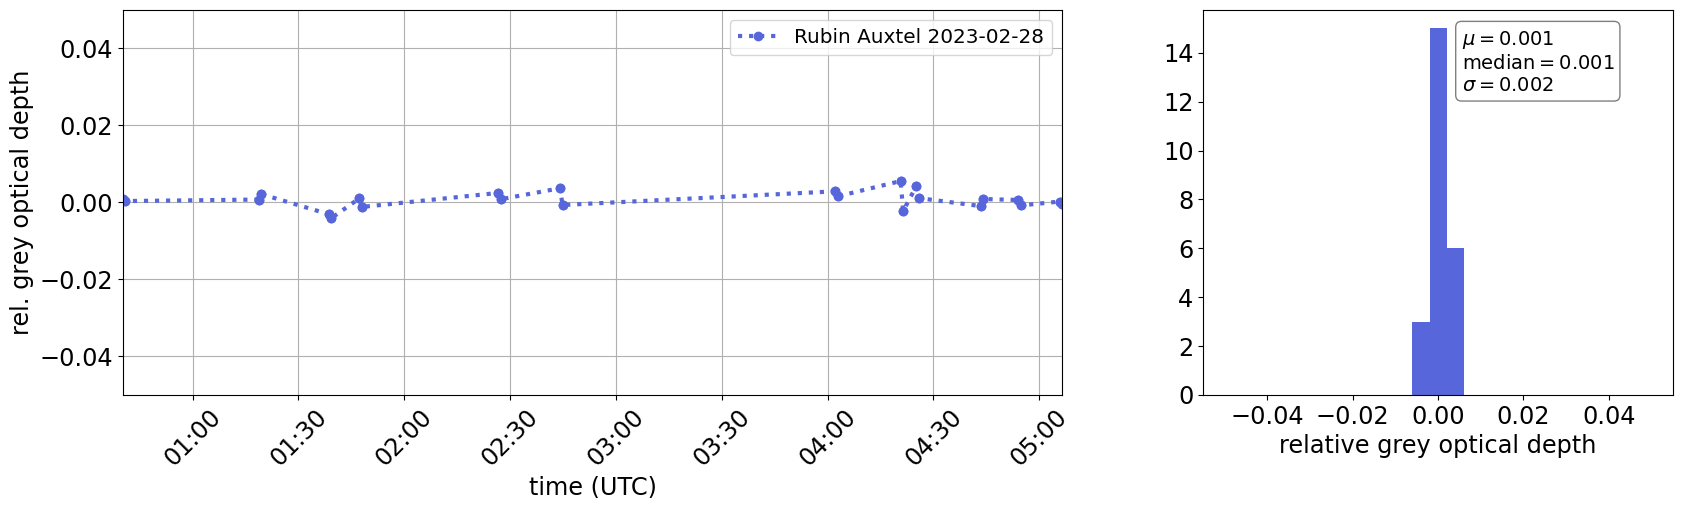

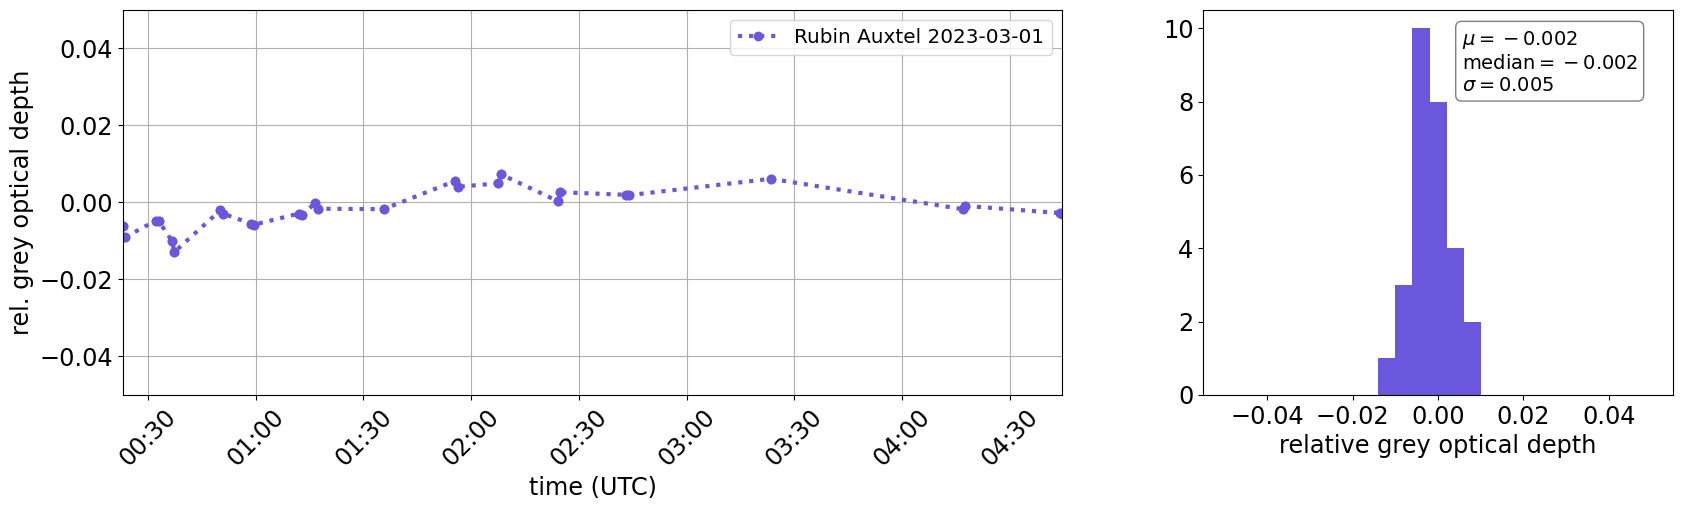

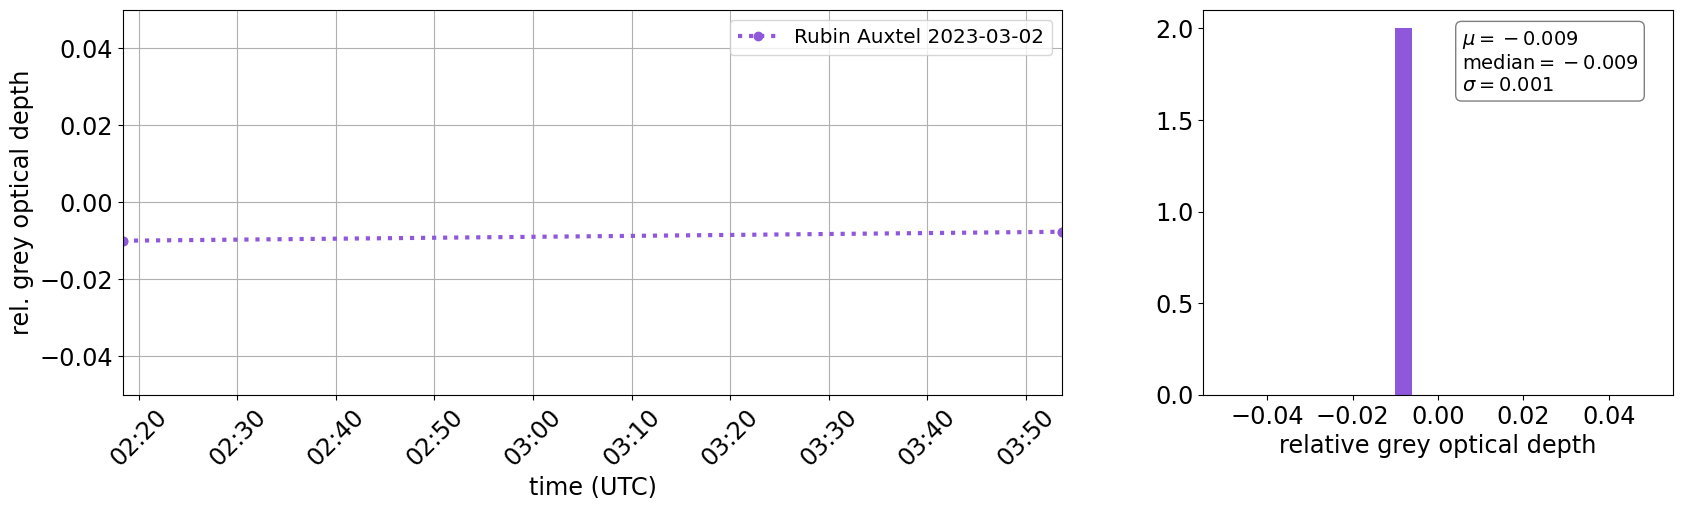

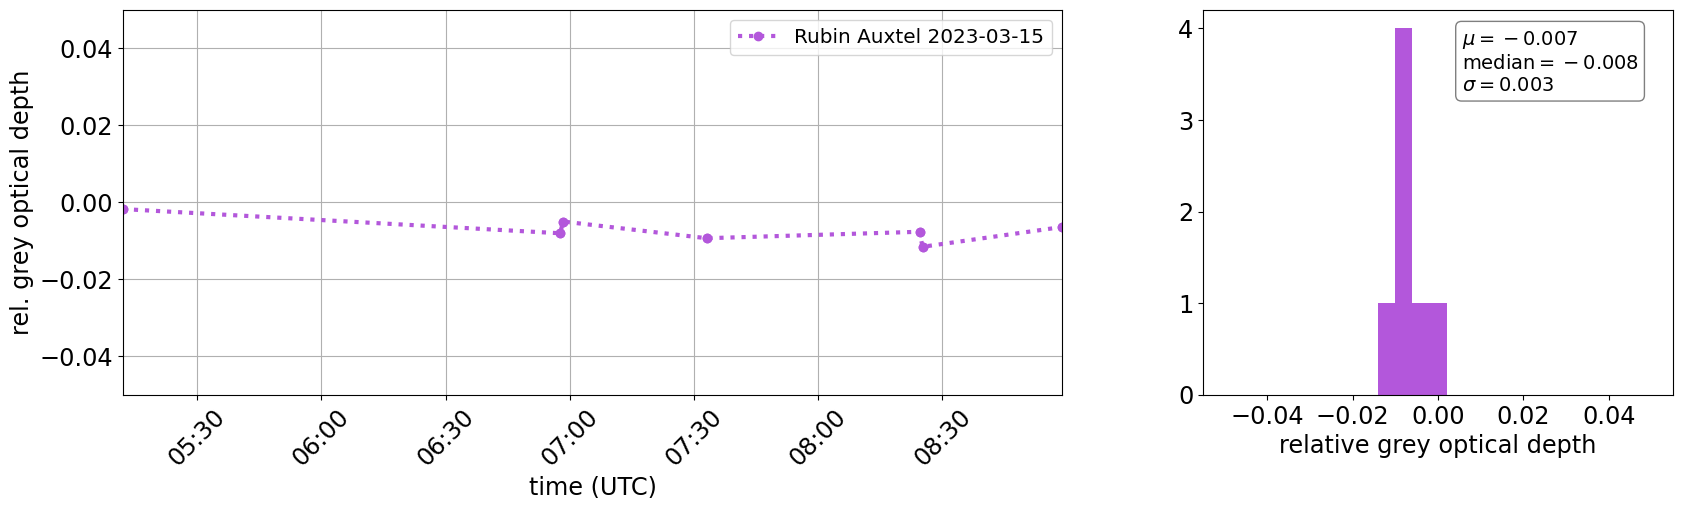

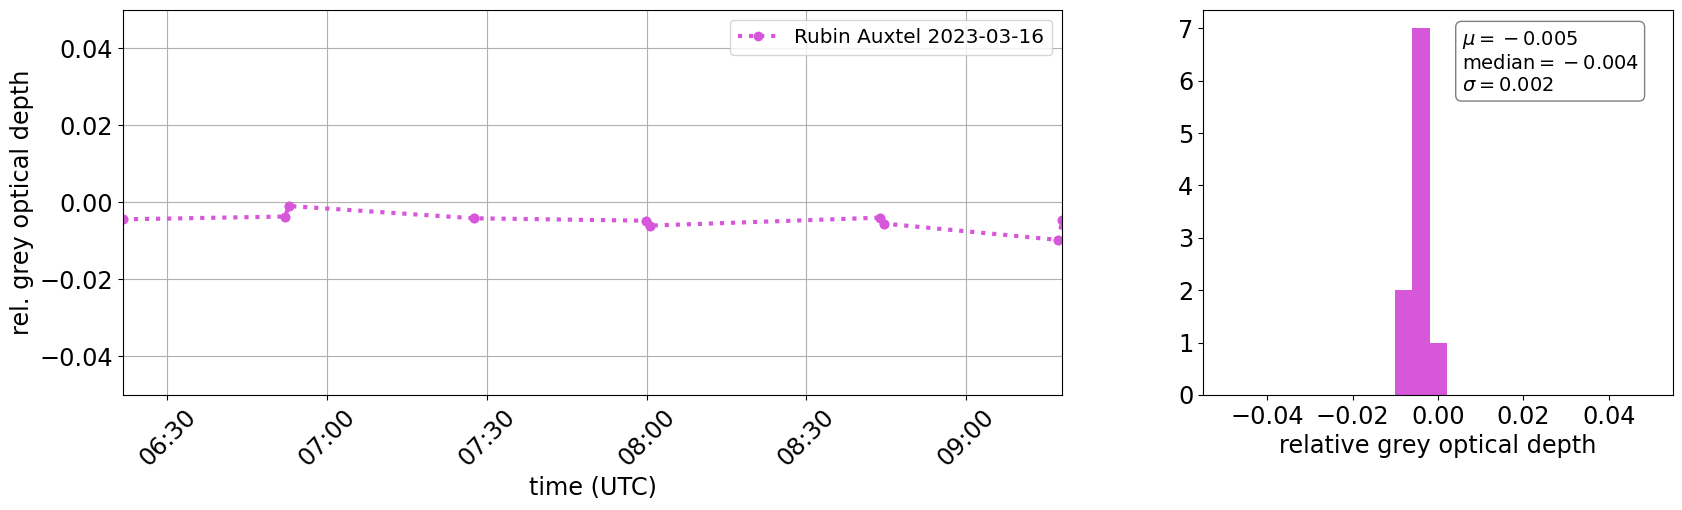

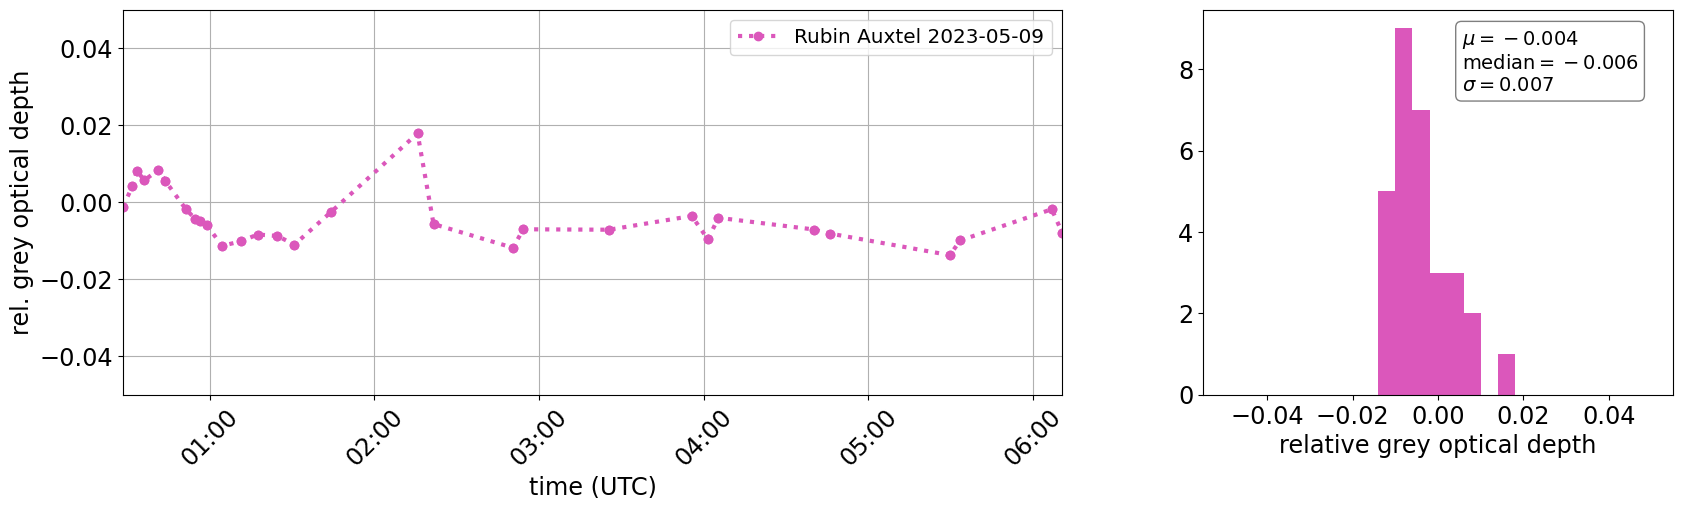

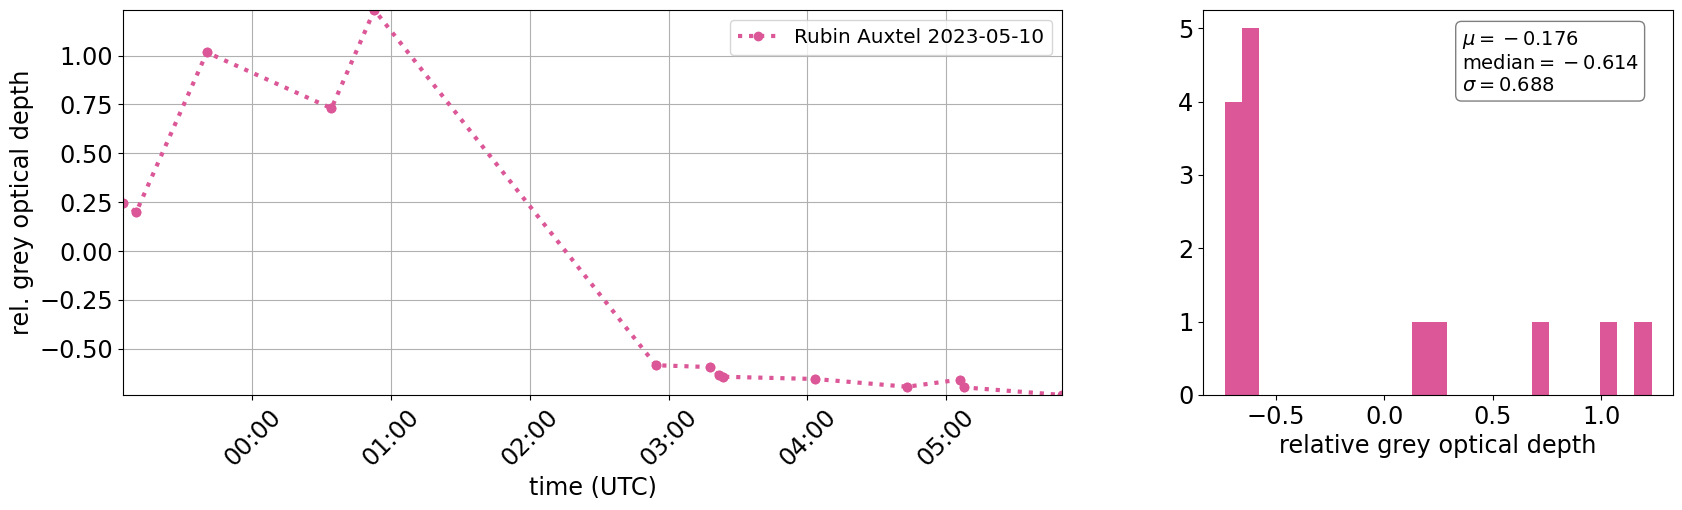

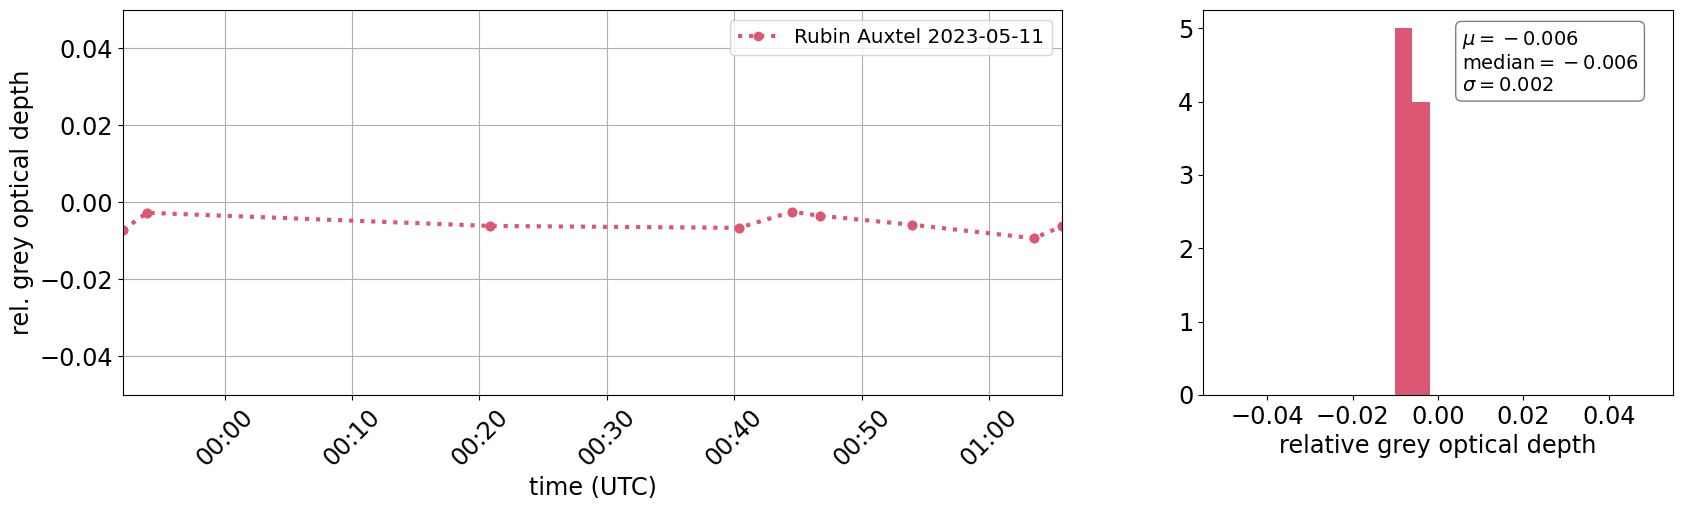

In [22]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    
    
    
    try:
        optdepth_min = optdepth.min()
        optdepth_max = optdepth.max()
    
    except ValueError:  #raised if `y` is empty.
        optdepth_min = -0.05
        optdepth_max = 0.05
    
    if np.abs(optdepth_min) < 0.05:
        optdepth_min = -0.05
        
    if np.abs(optdepth_max) < 0.05:
        optdepth_max = 0.05
         
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
   
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.legend()

    ax.set_xlim(start,end)
    ax.grid()
    ax.set_ylim(optdepth_min,optdepth_max)

    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(optdepth_min,optdepth_max),facecolor=hls_colors[idx])
    ax.set_xlabel("relative grey optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$ ' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted relative optical depth with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted relative optical with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_63077/1620180963.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_63077/1620180963.py:41: RuntimeWarning: Mean of empty slice.
  mu = optdepth.mean()
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sylvie/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype

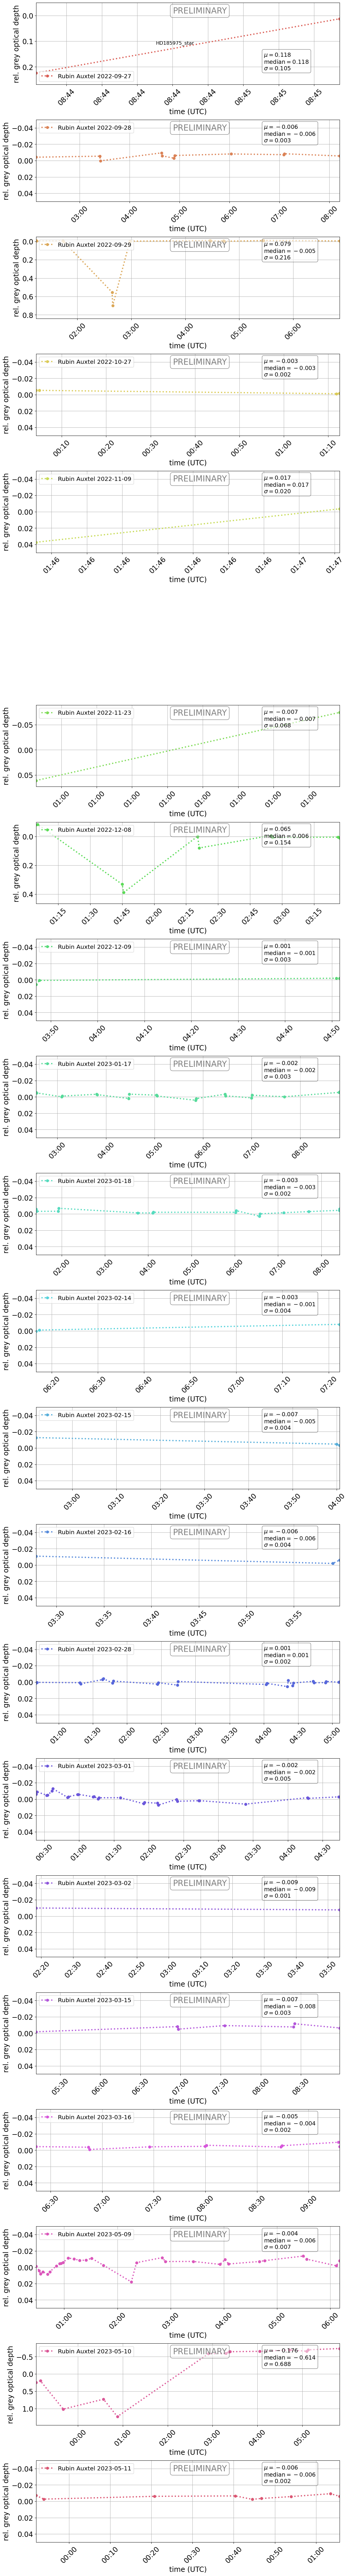

In [23]:
fig = plt.figure(figsize=(12,4*NF))

#gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)
gs = gridspec.GridSpec(NF, 1,height_ratios=np.ones(NF,dtype=int),figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    

    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    
    
    try:
        optdepth_min = optdepth.min()
        optdepth_max = optdepth.max()
    
    except ValueError:  #raised if `y` is empty.
        optdepth_min = -0.05
        optdepth_max = 0.05
    
    if np.abs(optdepth_min) < 0.05:
        optdepth_min = -0.05
    else:
        optdepth_min*=1.2
        
    if np.abs(optdepth_max) < 0.05:
        optdepth_max = 0.05
    else:
        optdepth_max*=1.2 
    
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.3f$ ' % (mu, ),
    r'$\mathrm{median}=%.3f$ ' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(optdepth_min,optdepth_max)
    ax.set_ylim(ax.get_ylim()[::-1])


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_greyoptdepth_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

## Find pairs

In [24]:
all_df[0].columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [25]:
all_df[0]

index       exposure                   spec_date_obs spec_target_label   
4     27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975  \
5     28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   

  spec_filter_label  spec_airmass  spec_pressure  spec_temperature   
4             empty      2.052135              0                 0  \
5             empty      2.052582              0                 0   

   spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3    chi2_4   
4              0      -239.381469  ...  0.001214  0.070459  3.429068  \
5              0      -239.202314  ...  0.002100  0.011859  5.505423   

      pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4  7.198238  0.642188  0.288268  0.001155  0.037200  6.366714  0.696058  
5  7.121764  0.988605  0.296650  0.001840  0.072462  6.234264  0.667250  

[2 rows x 98 columns]

In [26]:
sorted(all_datetime)

[datetime.datetime(2023, 5, 11, 23, 52, 1, 599992),
 datetime.datetime(2023, 5, 11, 23, 53, 55, 34507),
 datetime.datetime(2023, 5, 12, 0, 20, 48, 671995),
 datetime.datetime(2023, 5, 12, 0, 40, 22, 965507),
 datetime.datetime(2023, 5, 12, 0, 44, 31, 382492),
 datetime.datetime(2023, 5, 12, 0, 46, 44, 261509),
 datetime.datetime(2023, 5, 12, 0, 53, 58, 869992),
 datetime.datetime(2023, 5, 12, 1, 3, 30, 314510),
 datetime.datetime(2023, 5, 12, 1, 5, 44, 961991)]

In [27]:
np.argsort(all_datetime)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
for idx,infos in enumerate(all_df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    
    print(idx,"argsort=",np.argsort(all_datetime))
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print("difftime",difftimes)
                 
    

0 argsort= [0 1]
difftime [42]
1 argsort= [ 0  1  2  3  4  5  6  7  8  9 10]
difftime [4594, 42, 4398, 42, 866, 42, 4075, 3798, 42, 3981]
2 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
difftime [42, 1744, 42, 3240, 42, 1143, 42, 5302, 42, 867, 42, 2581, 42, 5083]
3 argsort= [0 1 2 3]
difftime [42, 4015, 42]
4 argsort= [0 1]
difftime [42]
5 argsort= []
difftime []
6 argsort= [0 1]
difftime [42]
7 argsort= [0 1 2 3 4 5 6 7 8 9]
difftime [42, 2377, 42, 2080, 42, 2023, 42, 1841, 42]
8 argsort= [0 1 2 3]
difftime [42, 3801, 42]
9 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
difftime [42, 1846, 42, 2554, 42, 2326, 42, 2030, 42, 2865, 42, 2123, 42, 1914, 42, 2407, 4054, 42]
10 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
difftime [42, 1788, 43, 6590, 1241, 42, 6855, 42, 1926, 42, 1987, 2074, 2533, 42]
11 argsort= [0 1 2]
difftime [43, 3903]
12 argsort= [0 1 2]
difftime [4087, 42]
13 argsort= [0 1 2]
difftime [1874, 43]
14 argsort= [ 0  1  2  3  4  

In [29]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    id_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            id_pairs.append(idx)
            
    all_doptdepth = []
    for idx in id_pairs:
    
        
        grey1 = df.iloc[idx]['grey_1']
        grey2 = df.iloc[idx+1]['grey_1']
        z1 = df.iloc[idx]['spec_airmass']
        z2 = df.iloc[idx+1]['spec_airmass']
        
        optdepth1 = -np.log(grey1)/z1
        optdepth2 = -np.log(grey2)/z2
        
        
        doptdepth = optdepth1-optdepth2
        all_doptdepth.append(doptdepth)       
    
    return np.array(id_pairs),np.array(all_doptdepth)
    

### Compute difference

In [30]:
all_diffgrey = []
for df in all_df:
    idxs_pairs, grey_diff = FindPairs(df)
    all_diffgrey.append(grey_diff)

In [31]:
all_diffgrey = np.concatenate(all_diffgrey,axis=0)

#### Fit gaussian

In [32]:
(mu_fit, sigma_fit) = norm.fit(all_diffgrey)

#### Statistics

In [33]:
the_mean =all_diffgrey.mean()

In [34]:
the_std = all_diffgrey.std()

In [35]:
the_median = np.median(all_diffgrey)

In [36]:
textstr_stat = '\n'.join((
    "stat:",
    r'$\mu=%.3f$' % (the_mean, ),
    r'$\mathrm{median}=%.3f$' % (the_median, ),
    r'$\sigma=%.3f$' % (the_std, )))

In [37]:
textstr_fit = '\n'.join((
    "fit :",
    r'$\mu=%.3f$ ' % (mu_fit, ),
    r'$\sigma=%.3f$' % (sigma_fit, )))

Text(0.5, 1.0, 'Grey optical depth difference in pairs')

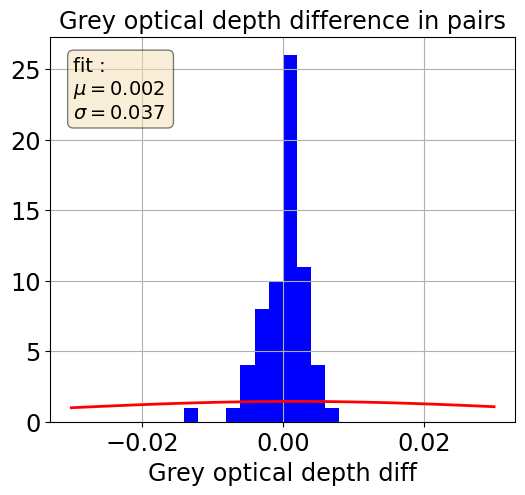

In [38]:
fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
h = ax.hist(all_diffgrey,bins=30,range=(-0.03,0.03),facecolor="b");

counts = h[0] # counts in each bin
counttotal = counts.sum()
bins = h[1] # edge
wbin = np.mean(np.diff(bins))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr_fit, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

y = norm.pdf(bins, mu_fit, sigma_fit)*counttotal*wbin
l = ax.plot(bins, y, 'r-', linewidth=2)



ax.set_xlabel("Grey optical depth diff")
ax.grid()
ax.set_title("Grey optical depth difference in pairs")

In [39]:
df= all_df[0]

In [40]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [41]:
2.5*np.log10(np.exp(-1.5))

-1.6286043071371945